In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/application_train_v3.csv')

In [5]:
df1.shape

(307511, 64)

In [6]:
df1.head(5)

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      100002       1         Cash loans           M            N   
1           1      100003       0         Cash loans           F            N   
2           2      100004       0    Revolving loans           M            Y   
3           3      100006       0         Cash loans           F            N   
4           4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
0               Y             0          202500.0    406597.5  ...   
1               N             0          270000.0   1293502.5  ...   
2               Y             0           67500.0    135000.0  ...   
3               Y             0          135000.0    312682.5  ...   
4               Y             0          121500.0    513000.0  ...   

   FLAG_DOCUMENT_13  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                0                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  
0                 0                         0.0  
1                 0                         0.0  
2                 0                         0.0  
3                 0                         NaN  
4                 0                         0.0  

[5 rows x 64 columns]

In [7]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [8]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
      

<ipython-input-9-6079fa691e98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi_matrix = df1.corr()


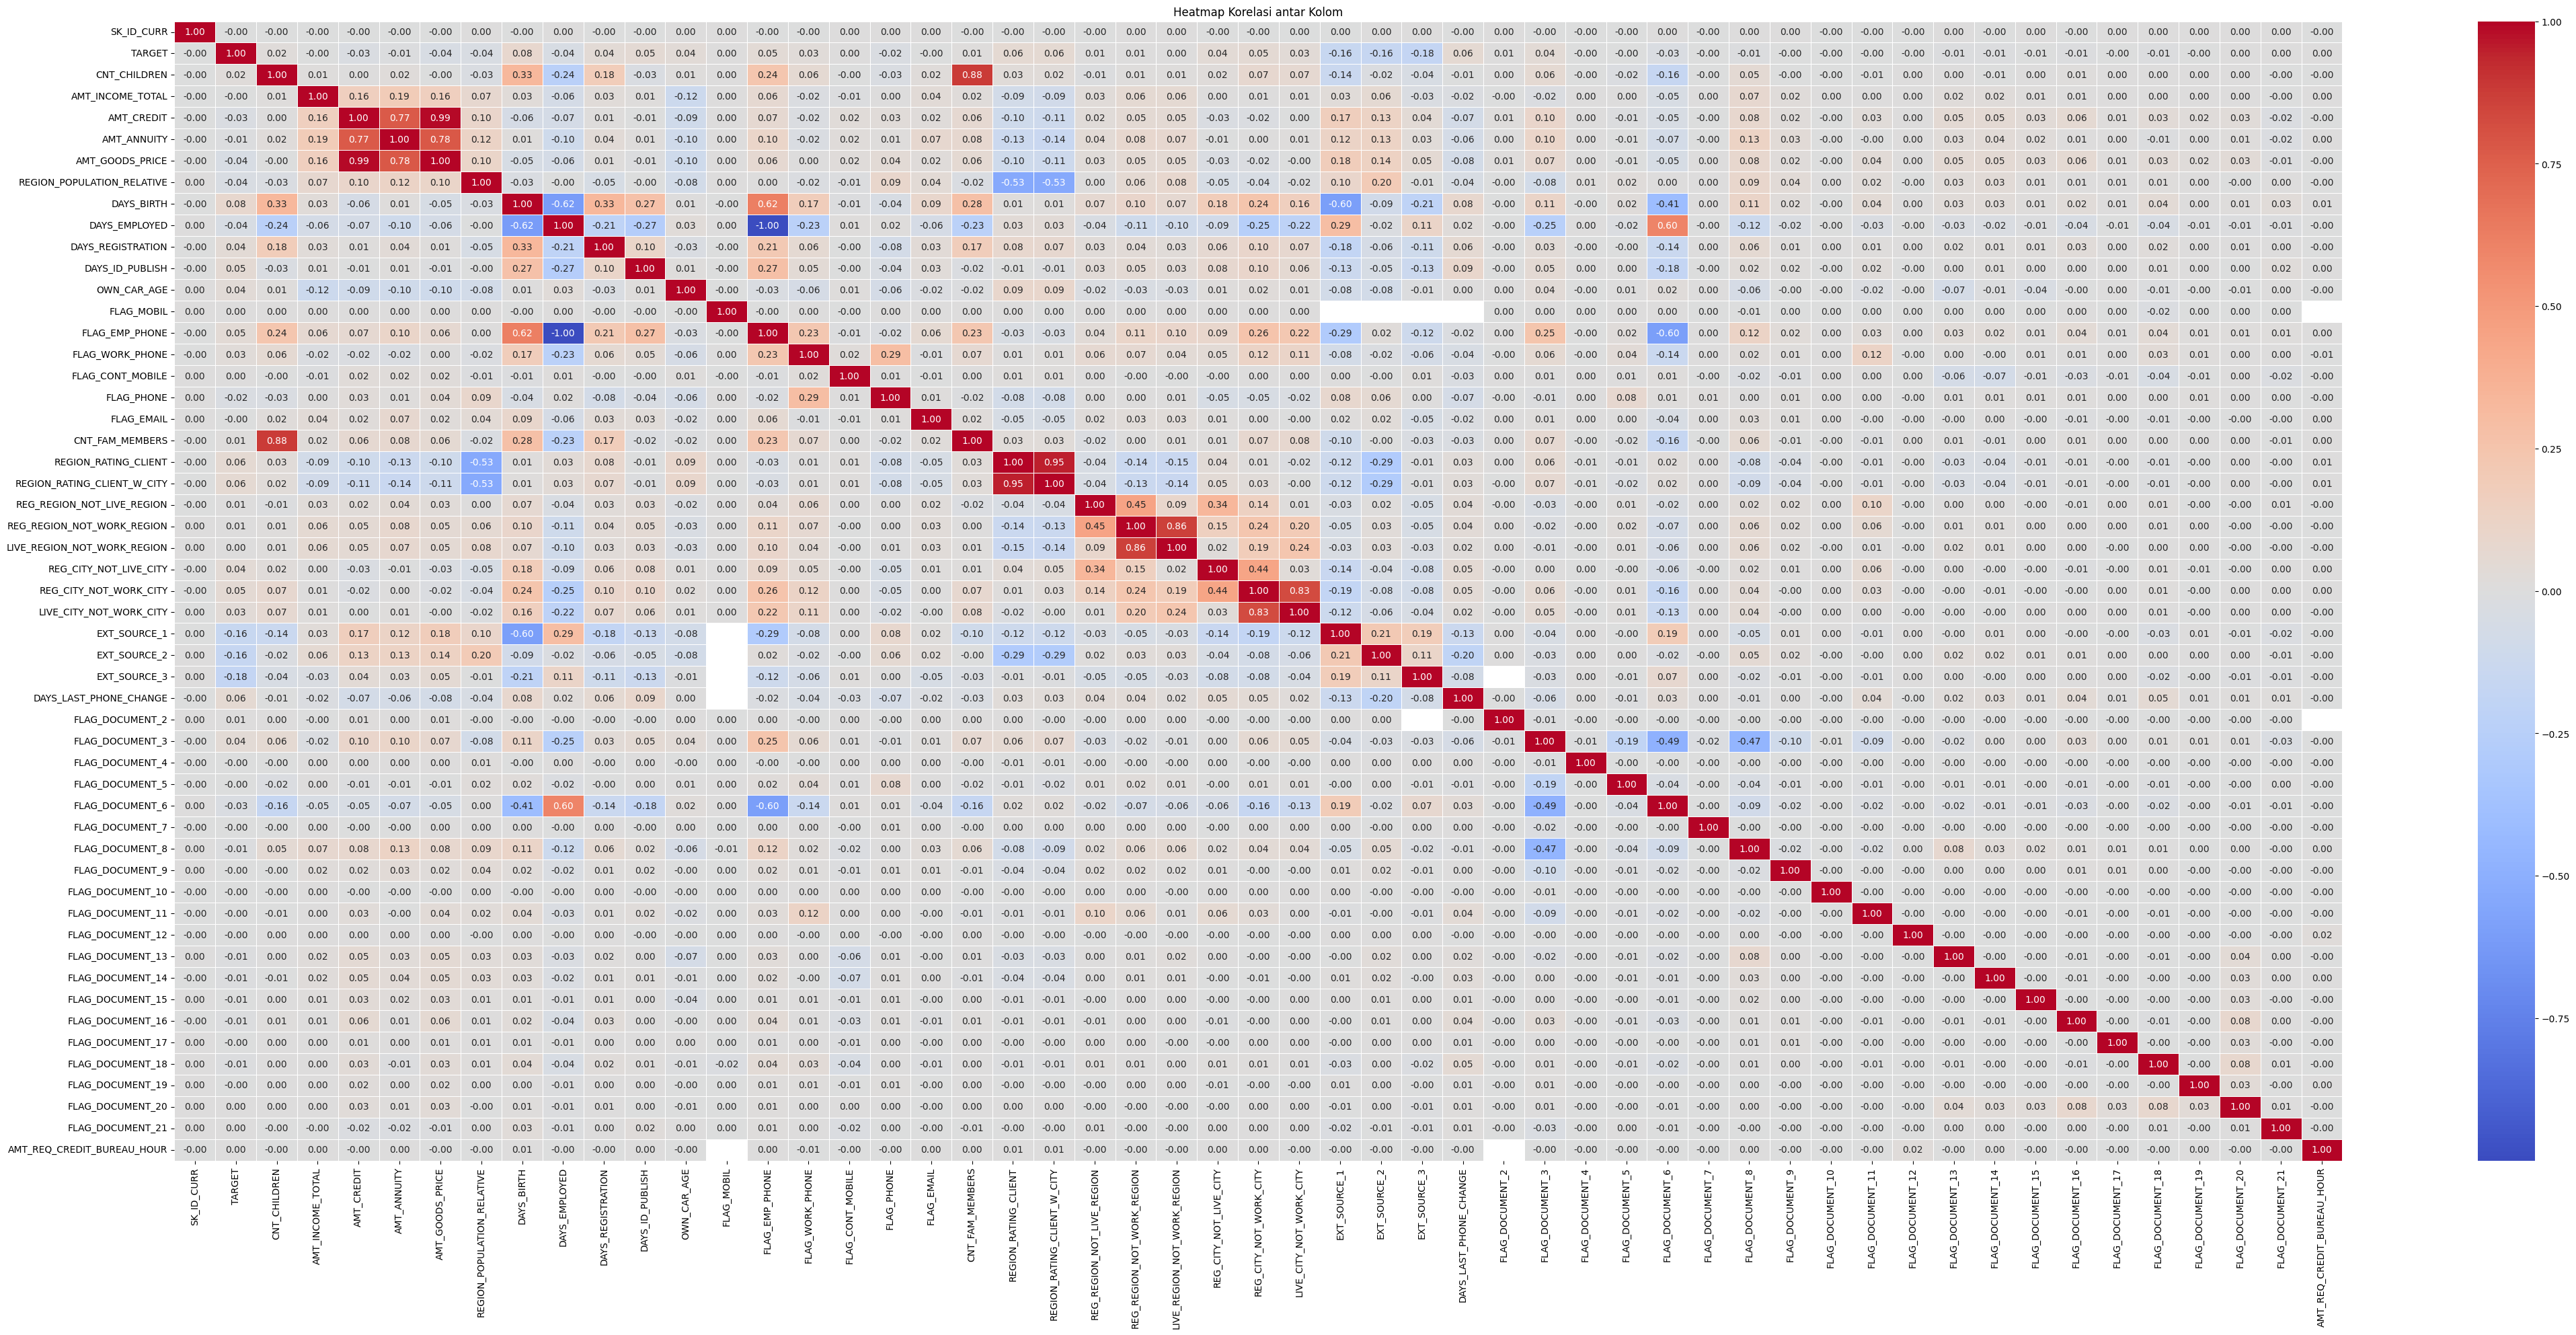

In [9]:
# Menghitung korelasi antar kolom
korelasi_matrix = df1.corr()

# Membuat heatmap
plt.figure(figsize=(52, 22))
sns.heatmap(korelasi_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

In [10]:
# Hapus column
columns_to_drop = ['DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                   'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                   'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                   'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                   'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR']


df1 = df1.drop(columns=columns_to_drop)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

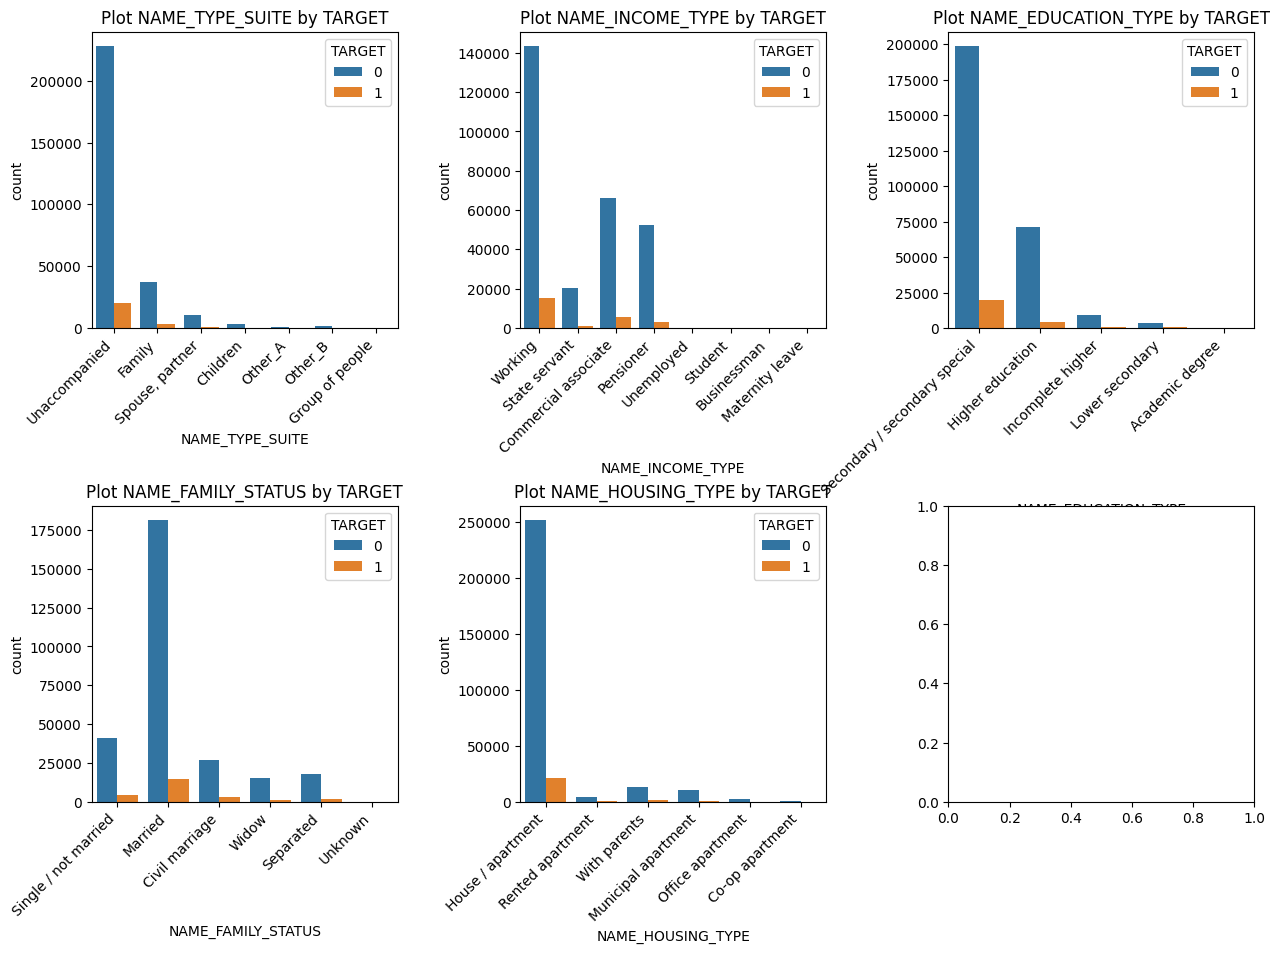

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List nama kolom yang akan divisualisasikan
columns_to_visualize = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Membuat subplots sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Mengatur tata letak subplot
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterasi untuk membuat stacked bar plot untuk setiap kolom
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=column, hue='TARGET')
    plt.title(f'Plot {column} by TARGET')
    plt.xticks(rotation=45, ha='right')

plt.show()

In [13]:
# Filter data dengan target 1
data_target_1_only = df1[df1['TARGET'] == 1]

# Tampilkan hasil atau lakukan operasi lainnya pada data_target_1_only
print(data_target_1_only)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [14]:
# Filter data dengan target 0
data_target_0_only = df1[df1['TARGET'] == 0]

print(data_target_0_only)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0     

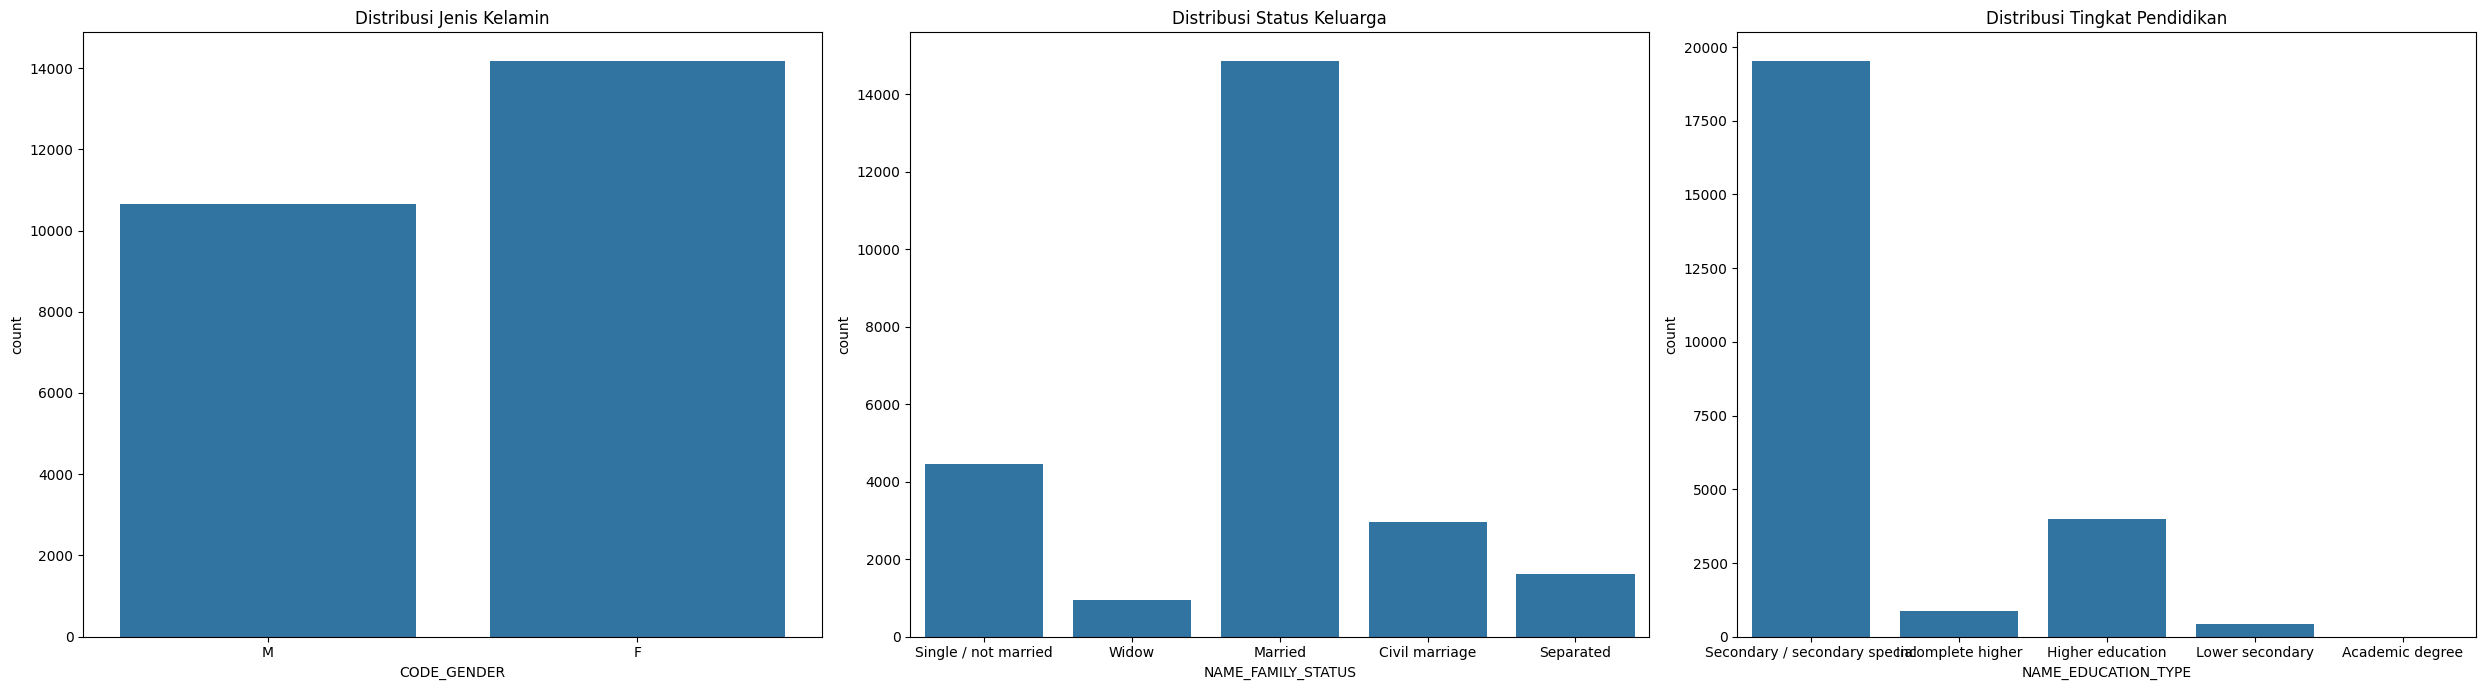

In [15]:
# Visualisasi Distribusi Demografi
plt.figure(figsize=(25, 7))
plt.subplot(1, 3, 1)
sns.countplot(data=data_target_1_only, x='CODE_GENDER')
plt.title('Distribusi Jenis Kelamin')

plt.subplot(1, 3, 2)
sns.countplot(data=data_target_1_only, x='NAME_FAMILY_STATUS')
plt.title('Distribusi Status Keluarga')

plt.subplot(1, 3, 3)
sns.countplot(data=data_target_1_only, x='NAME_EDUCATION_TYPE')
plt.title('Distribusi Tingkat Pendidikan')

plt.tight_layout()
plt.show()

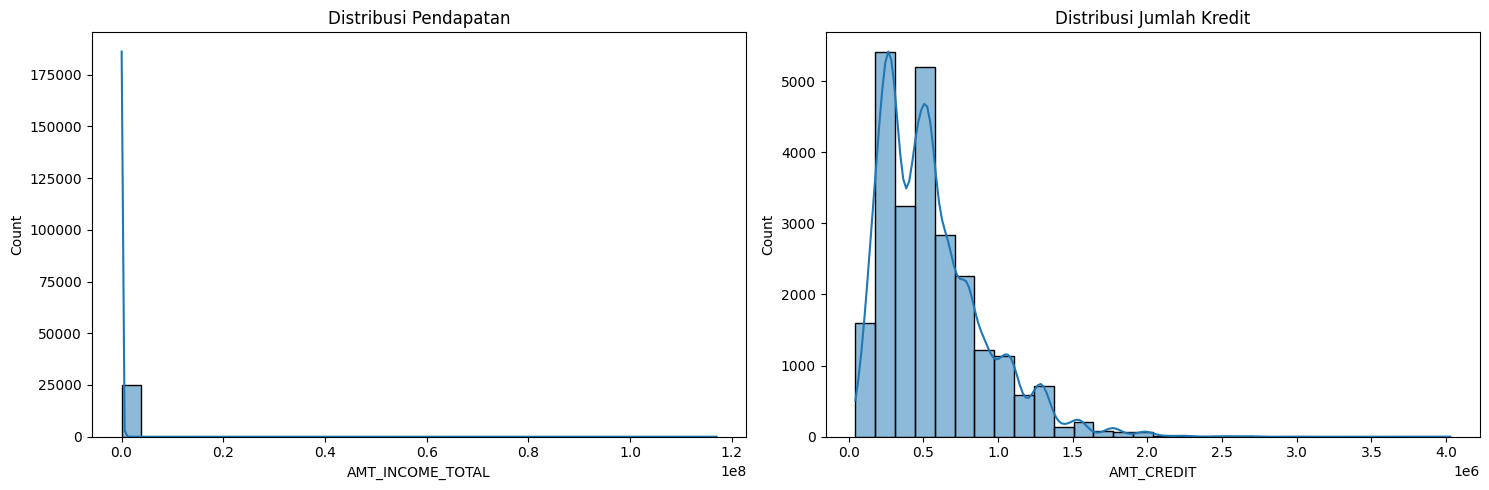

In [16]:
# Visualisasi Pendapatan dan Kredit
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data_target_1_only, x='AMT_INCOME_TOTAL', bins=30, kde=True)
plt.title('Distribusi Pendapatan')

plt.subplot(1, 2, 2)
sns.histplot(data=data_target_1_only, x='AMT_CREDIT', bins=30, kde=True)
plt.title('Distribusi Jumlah Kredit')

plt.tight_layout()
plt.show()

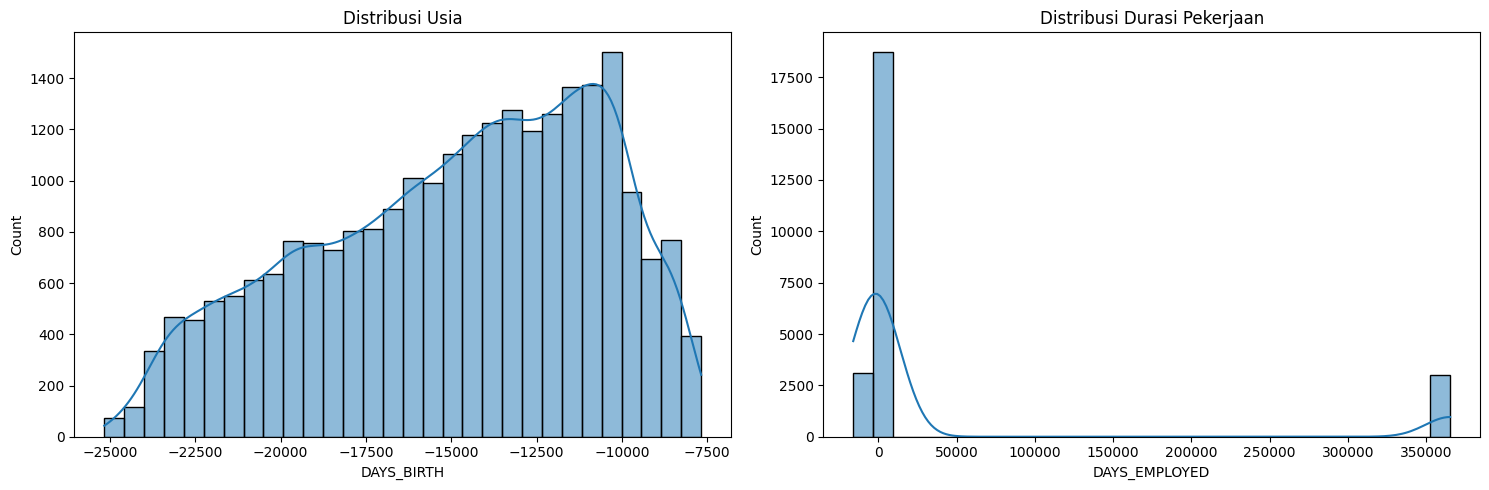

In [17]:
# Visualisasi Kondisi Temporal
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data_target_1_only, x='DAYS_BIRTH', bins=30, kde=True)
plt.title('Distribusi Usia')

plt.subplot(1, 2, 2)
sns.histplot(data=data_target_1_only, x='DAYS_EMPLOYED', bins=30, kde=True)
plt.title('Distribusi Durasi Pekerjaan')

plt.tight_layout()
plt.show()

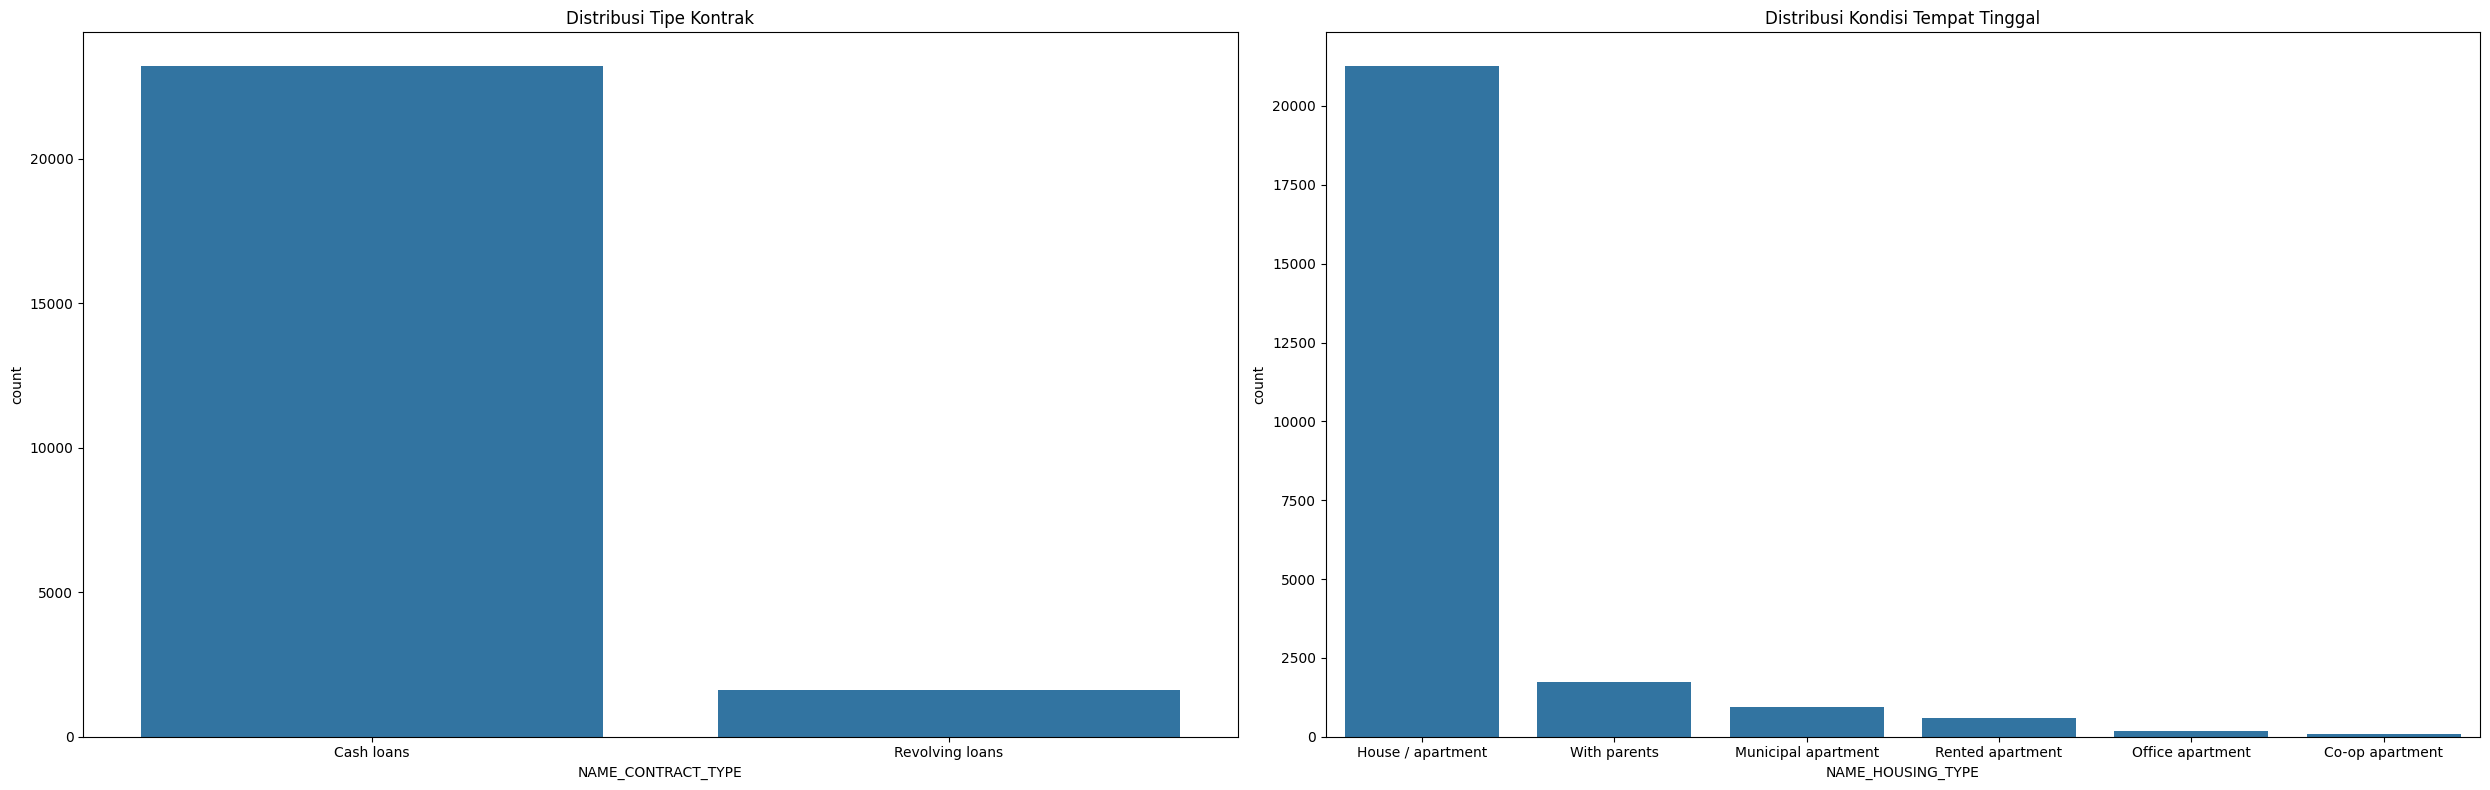

In [18]:
# Visualisasi Tipe Kontrak dan Kondisi Tempat Tinggal
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=data_target_1_only, x='NAME_CONTRACT_TYPE')
plt.title('Distribusi Tipe Kontrak')

plt.subplot(1, 2, 2)
sns.countplot(data=data_target_1_only, x='NAME_HOUSING_TYPE')
plt.title('Distribusi Kondisi Tempat Tinggal')

plt.tight_layout()
plt.show()

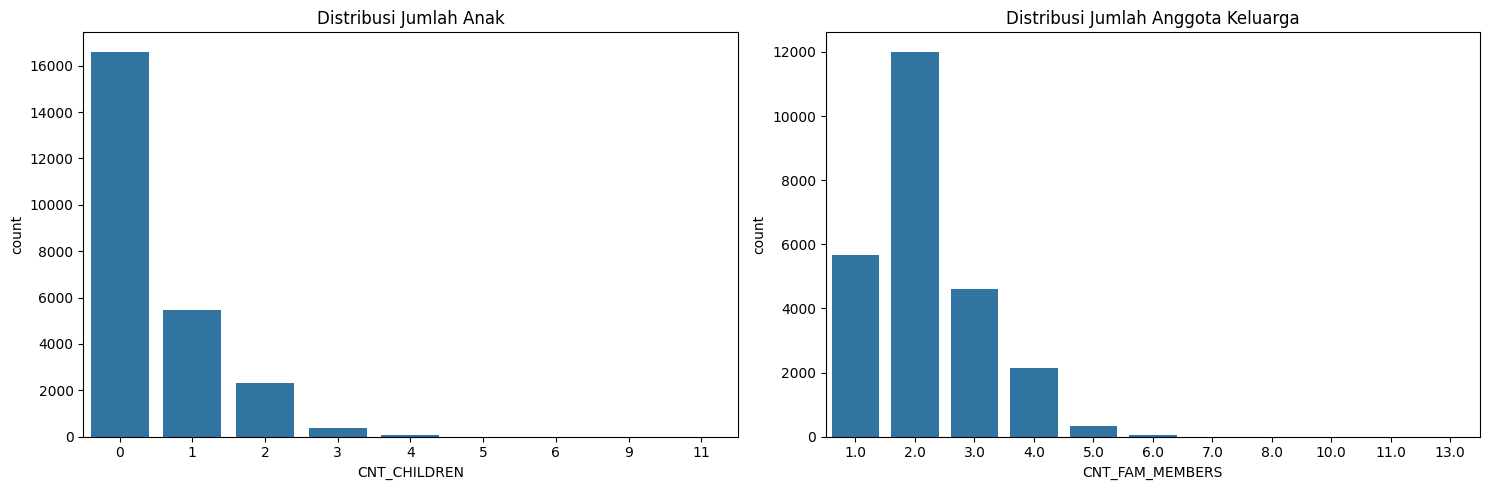

In [19]:
# Visualisasi Jumlah Anak dan Keluarga
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_target_1_only, x='CNT_CHILDREN')
plt.title('Distribusi Jumlah Anak')

plt.subplot(1, 2, 2)
sns.countplot(data=data_target_1_only, x='CNT_FAM_MEMBERS')
plt.title('Distribusi Jumlah Anggota Keluarga')

plt.tight_layout()
plt.show()

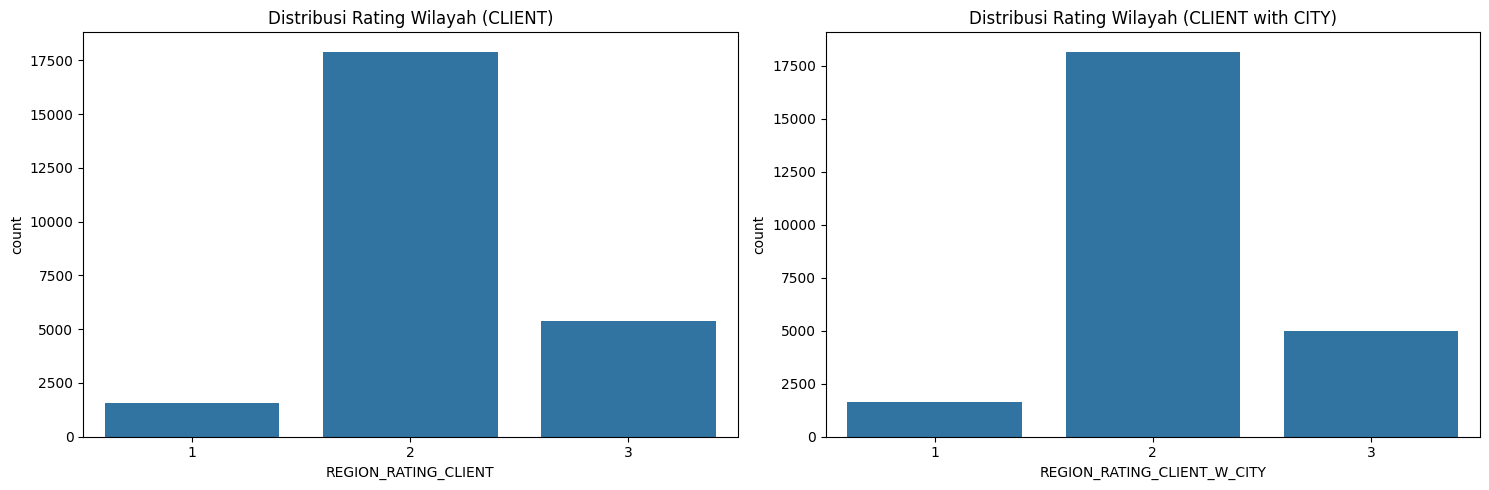

In [89]:
# Visualisasi Rating Wilayah
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_target_1_only, x='REGION_RATING_CLIENT')
plt.title('Distribusi Rating Wilayah (CLIENT)')

plt.subplot(1, 2, 2)
sns.countplot(data=data_target_1_only, x='REGION_RATING_CLIENT_W_CITY')
plt.title('Distribusi Rating Wilayah (CLIENT with CITY)')

plt.tight_layout()
plt.show()

Tidak Gagal Membayar

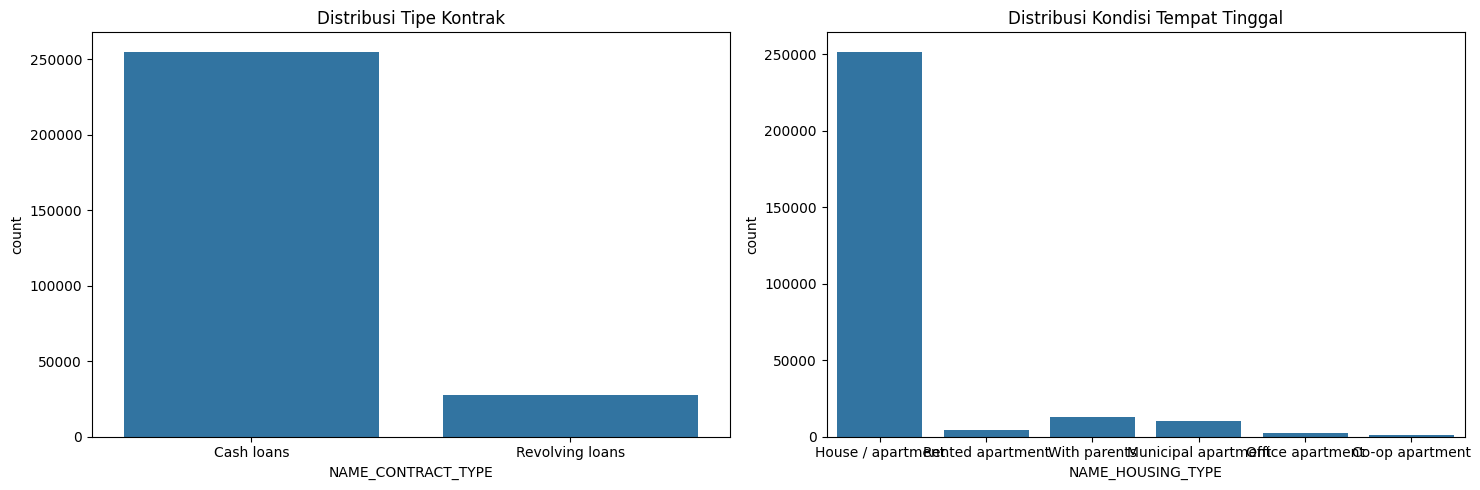

In [20]:
# Visualisasi Tipe Kontrak dan Kondisi Tempat Tinggal
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_target_0_only, x='NAME_CONTRACT_TYPE')
plt.title('Distribusi Tipe Kontrak')

plt.subplot(1, 2, 2)
sns.countplot(data=data_target_0_only, x='NAME_HOUSING_TYPE')
plt.title('Distribusi Kondisi Tempat Tinggal')

plt.tight_layout()
plt.show()

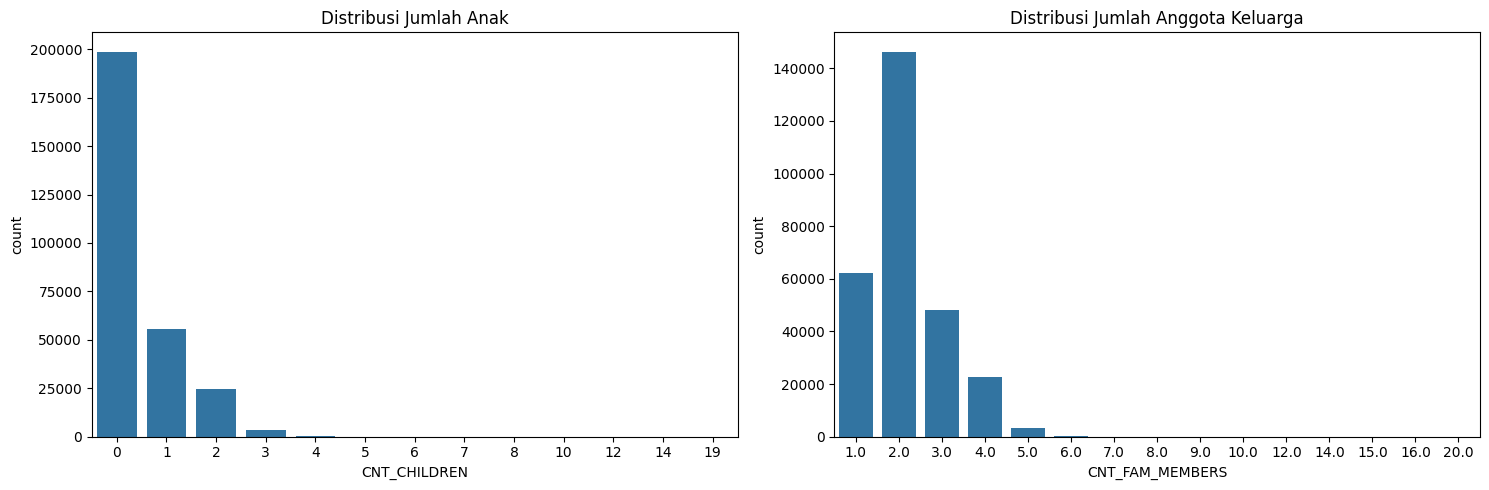

In [21]:
# Visualisasi Jumlah Anak dan Keluarga
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_target_0_only, x='CNT_CHILDREN')
plt.title('Distribusi Jumlah Anak')

plt.subplot(1, 2, 2)
sns.countplot(data=data_target_0_only, x='CNT_FAM_MEMBERS')
plt.title('Distribusi Jumlah Anggota Keluarga')

plt.tight_layout()
plt.show()

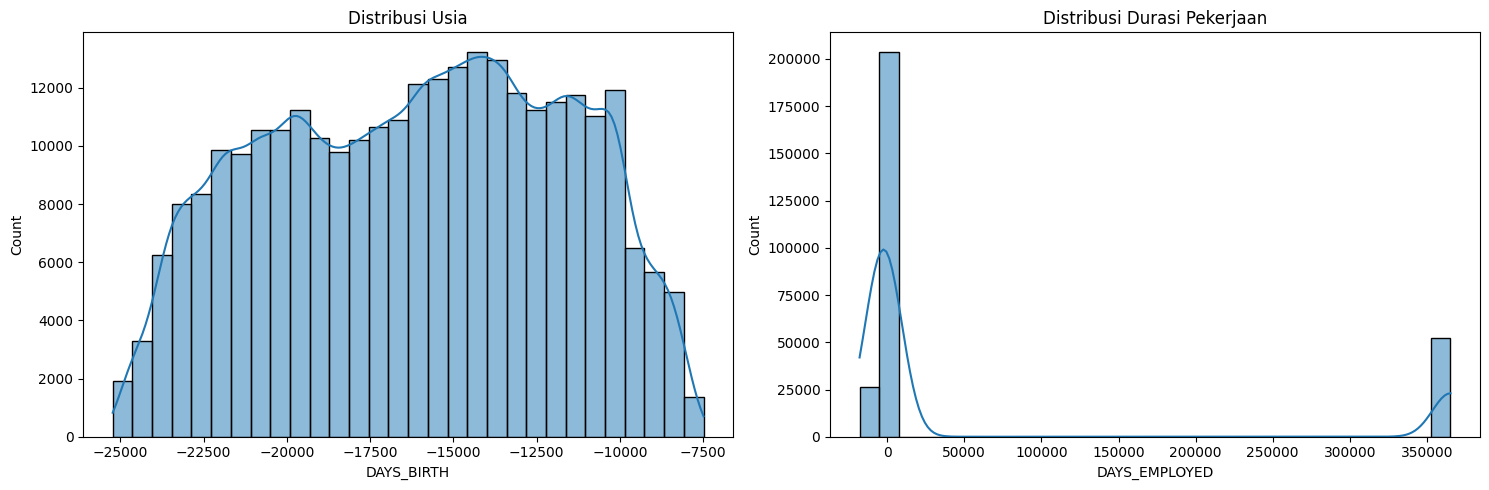

In [22]:
# Visualisasi Kondisi Temporal
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data_target_0_only, x='DAYS_BIRTH', bins=30, kde=True)
plt.title('Distribusi Usia')

plt.subplot(1, 2, 2)
sns.histplot(data=data_target_0_only, x='DAYS_EMPLOYED', bins=30, kde=True)
plt.title('Distribusi Durasi Pekerjaan')

plt.tight_layout()
plt.show()

In [23]:
# Daftar variabel yang ingin dihitung rata-ratanya
columns_to_compare = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']

# Membuat DataFrame untuk rata-rata data_target_1_only
mean_data_target_1 = data_target_1_only[columns_to_compare].mean().reset_index()
mean_data_target_1.columns = ['Variable', 'Mean_Target_1']

# Membuat DataFrame untuk rata-rata data_target_0_only
mean_data_target_0 = data_target_0_only[columns_to_compare].mean().reset_index()
mean_data_target_0.columns = ['Variable', 'Mean_Target_0']

# Menggabungkan rata-rata kedua DataFrame
mean_comparison = pd.merge(mean_data_target_1, mean_data_target_0, on='Variable')

# Tampilkan hasil perbandingan rata-rata
print(mean_comparison)

           Variable  Mean_Target_1  Mean_Target_0
0  AMT_INCOME_TOTAL  165611.760906  169077.722266
1        AMT_CREDIT  557778.527674  602648.282002


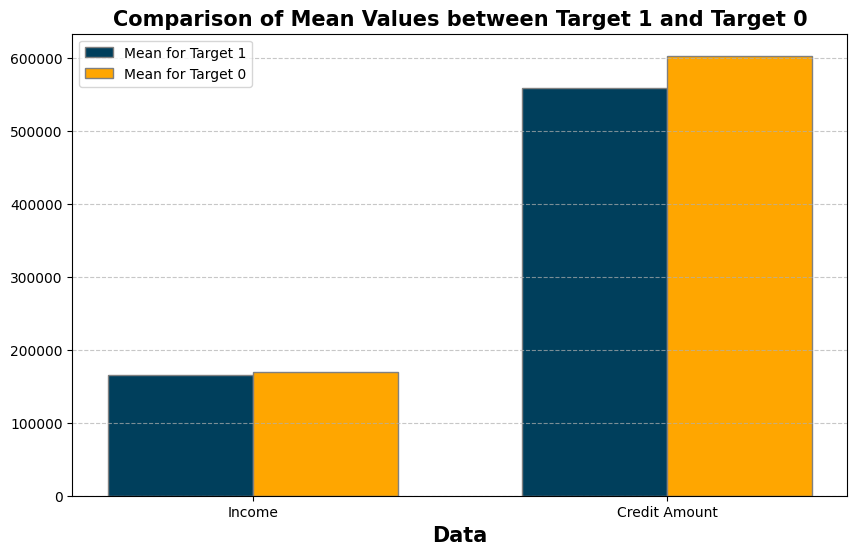

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Variabel yang akan dihitung rata-ratanya
variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']

# Rata-rata untuk data_target_1_only
mean_target_1 = data_target_1_only[variables].mean().values

# Rata-rata untuk data_target_0_only
mean_target_0 = data_target_0_only[variables].mean().values

# Label variabel
labels = ['Income', 'Credit Amount']

# Jumlah variabel
num_variables = len(variables)

# Warna pastel untuk setiap kategori (rata-rata target 1 dan rata-rata target 0)
colors = ['#003f5c', '#ffa600']

# Lebar batang
bar_width = 0.35

# Koordinat x untuk kedua kategori
r1 = np.arange(num_variables)
r2 = [x + bar_width for x in r1]

# Visualisasi dengan pyplot
plt.figure(figsize=(10, 6))

plt.bar(r1, mean_target_1, color=colors[0], width=bar_width, edgecolor='grey', label='Mean for Target 1')
plt.bar(r2, mean_target_0, color=colors[1], width=bar_width, edgecolor='grey', label='Mean for Target 0')

# Menambahkan label dan judul
plt.xlabel('Data', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(num_variables)], labels)
plt.legend()

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan judul
plt.title('Comparison of Mean Values between Target 1 and Target 0', fontweight='bold', fontsize=15)

plt.show()

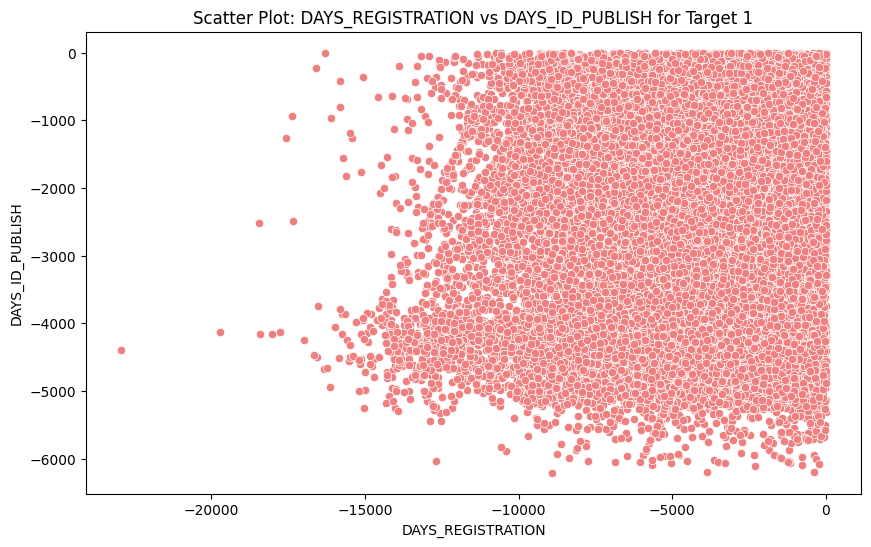

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot antara DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAYS_REGISTRATION', y='DAYS_ID_PUBLISH', data=data_target_1_only, color='lightcoral')
plt.title('Scatter Plot: DAYS_REGISTRATION vs DAYS_ID_PUBLISH for Target 1')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('DAYS_ID_PUBLISH')
plt.show()

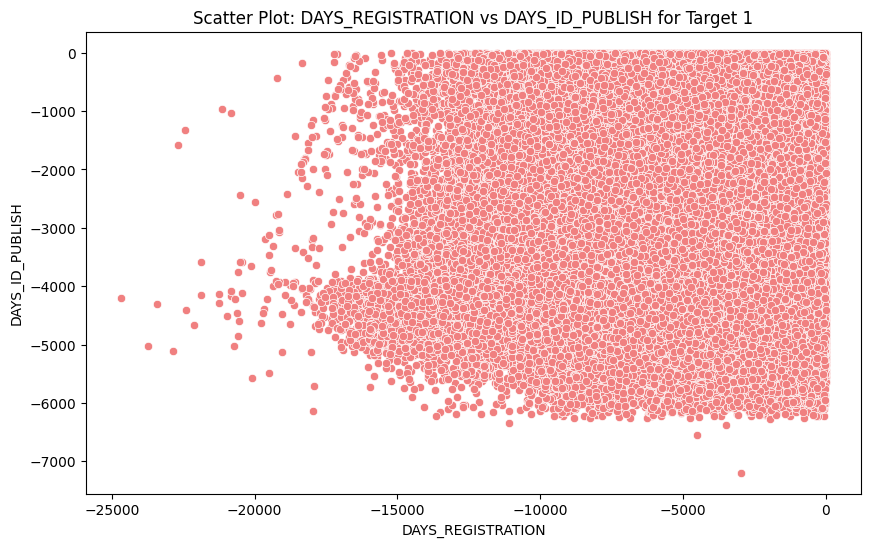

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot antara DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAYS_REGISTRATION', y='DAYS_ID_PUBLISH', data=data_target_0_only, color='lightcoral')
plt.title('Scatter Plot: DAYS_REGISTRATION vs DAYS_ID_PUBLISH for Target 1')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('DAYS_ID_PUBLISH')
plt.show()

In [97]:
# Menghitung rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
mean_days_registration = data_target_1_only['DAYS_REGISTRATION'].mean()
mean_days_publish = data_target_1_only['DAYS_ID_PUBLISH'].mean()

# Menampilkan hasil
print(f'Rata-rata DAYS_REGISTRATION untuk pelanggan target 1: {mean_days_registration:.2f} hari')
print(f'Rata-rata DAYS_ID_PUBLISH untuk pelanggan target 1: {mean_days_publish:.2f} hari')

Rata-rata DAYS_REGISTRATION untuk pelanggan target 1: -4487.13 hari
Rata-rata DAYS_ID_PUBLISH untuk pelanggan target 1: -2732.10 hari


In [139]:
# Menghitung rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
mean_days_registration = data_target_0_only['DAYS_REGISTRATION'].mean()
mean_days_publish = data_target_0_only['DAYS_ID_PUBLISH'].mean()

# Menampilkan hasil
print(f'Rata-rata DAYS_REGISTRATION untuk pelanggan target 0: {mean_days_registration:.2f} hari')
print(f'Rata-rata DAYS_ID_PUBLISH untuk pelanggan target 0: {mean_days_publish:.2f} hari')

Rata-rata DAYS_REGISTRATION untuk pelanggan target 0: -5029.94 hari
Rata-rata DAYS_ID_PUBLISH untuk pelanggan target 0: -3017.22 hari


<ipython-input-27-741729675b06>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean', y='Variable', data=mean_data, palette='pastel')


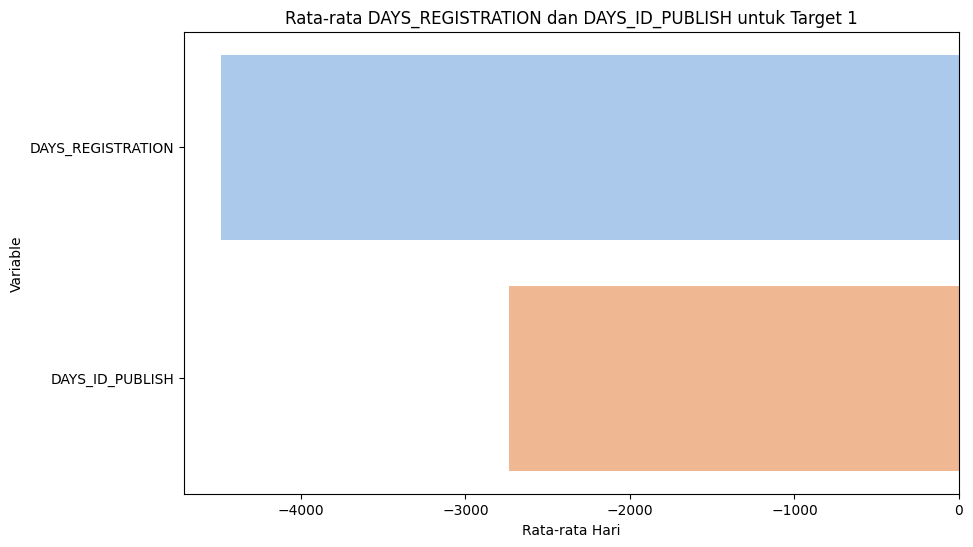

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
mean_days_registration = data_target_1_only['DAYS_REGISTRATION'].mean()
mean_days_publish = data_target_1_only['DAYS_ID_PUBLISH'].mean()

# Membuat DataFrame untuk rata-rata
mean_data = pd.DataFrame({
    'Variable': ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'],
    'Mean': [mean_days_registration, mean_days_publish]
})

# Visualisasi dengan horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean', y='Variable', data=mean_data, palette='pastel')
plt.title('Rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH untuk Target 1')
plt.xlabel('Rata-rata Hari')
plt.show()

<ipython-input-135-cc80b8793de5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean', y='Variable', data=mean_data, palette='pastel')


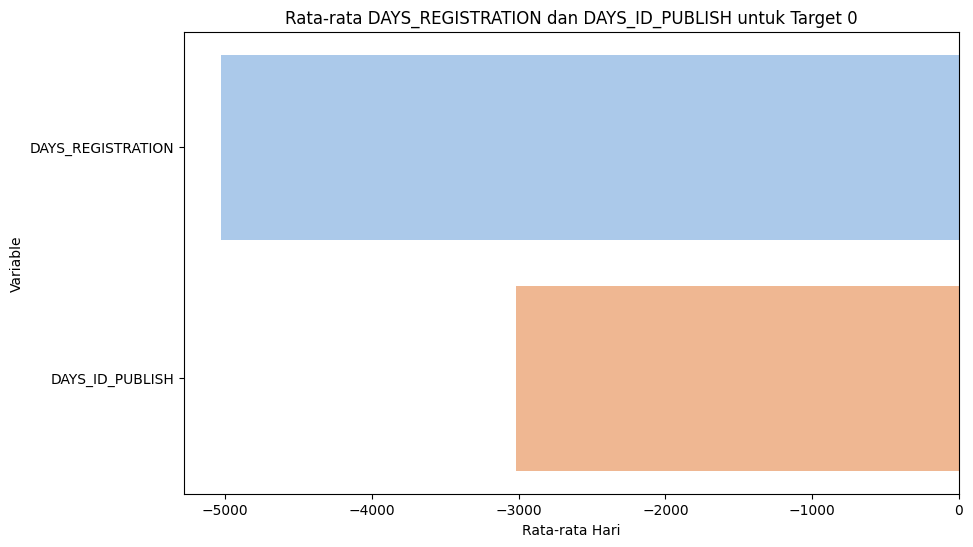

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH pada data_target_1_only
mean_days_registration = data_target_0_only['DAYS_REGISTRATION'].mean()
mean_days_publish = data_target_0_only['DAYS_ID_PUBLISH'].mean()

# Membuat DataFrame untuk rata-rata
mean_data = pd.DataFrame({
    'Variable': ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'],
    'Mean': [mean_days_registration, mean_days_publish]
})

# Visualisasi dengan horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean', y='Variable', data=mean_data, palette='pastel')
plt.title('Rata-rata DAYS_REGISTRATION dan DAYS_ID_PUBLISH untuk Target 0')
plt.xlabel('Rata-rata Hari')
plt.show()

In [29]:
data_target_1_only['DAYS_REGISTRATION']

0        -3648.0
26       -6573.0
40       -1182.0
42         -45.0
81       -5391.0
           ...  
307448   -8507.0
307475    -500.0
307481   -8921.0
307489   -8291.0
307509   -2562.0
Name: DAYS_REGISTRATION, Length: 24825, dtype: float64

<ipython-input-30-0b67f7031976>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_distribution.index, y=education_distribution.values, palette='pastel')
<ipython-input-30-0b67f7031976>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suite_distribution.index, y=suite_distribution.values, palette='pastel')


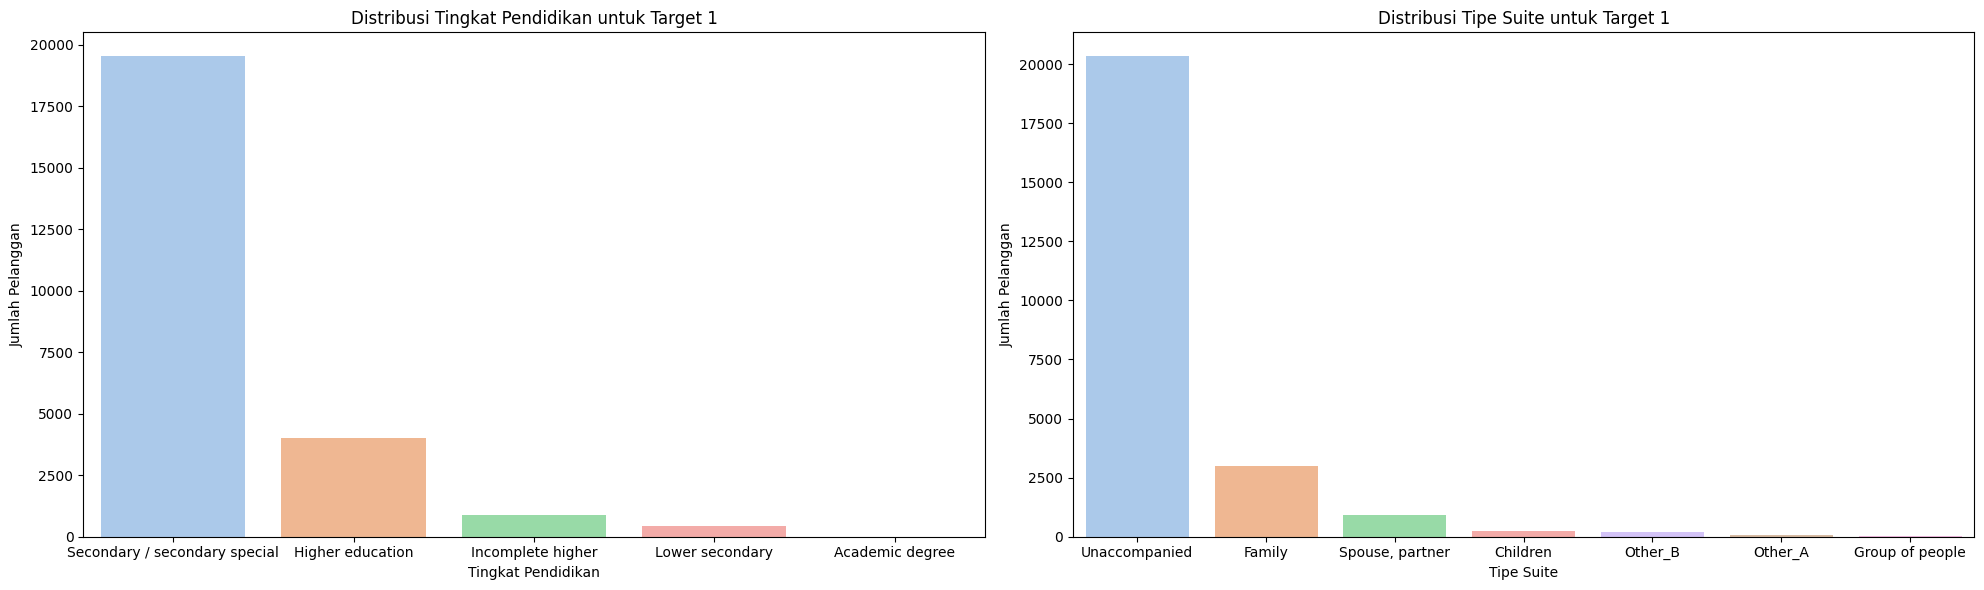

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi tingkat pendidikan dan tipe suite pada data_target_1_only
education_distribution = data_target_1_only['NAME_EDUCATION_TYPE'].value_counts()
suite_distribution = data_target_1_only['NAME_TYPE_SUITE'].value_counts()

# Visualisasi distribusi tingkat pendidikan
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=education_distribution.index, y=education_distribution.values, palette='pastel')
plt.title('Distribusi Tingkat Pendidikan untuk Target 1')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')

# Visualisasi distribusi tipe suite
plt.subplot(1, 2, 2)
sns.barplot(x=suite_distribution.index, y=suite_distribution.values, palette='pastel')
plt.title('Distribusi Tipe Suite untuk Target 1')
plt.xlabel('Tipe Suite')
plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

<ipython-input-31-e92597f62cef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_distribution.index, y=education_distribution.values, palette='pastel')
<ipython-input-31-e92597f62cef>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suite_distribution.index, y=suite_distribution.values, palette='pastel')


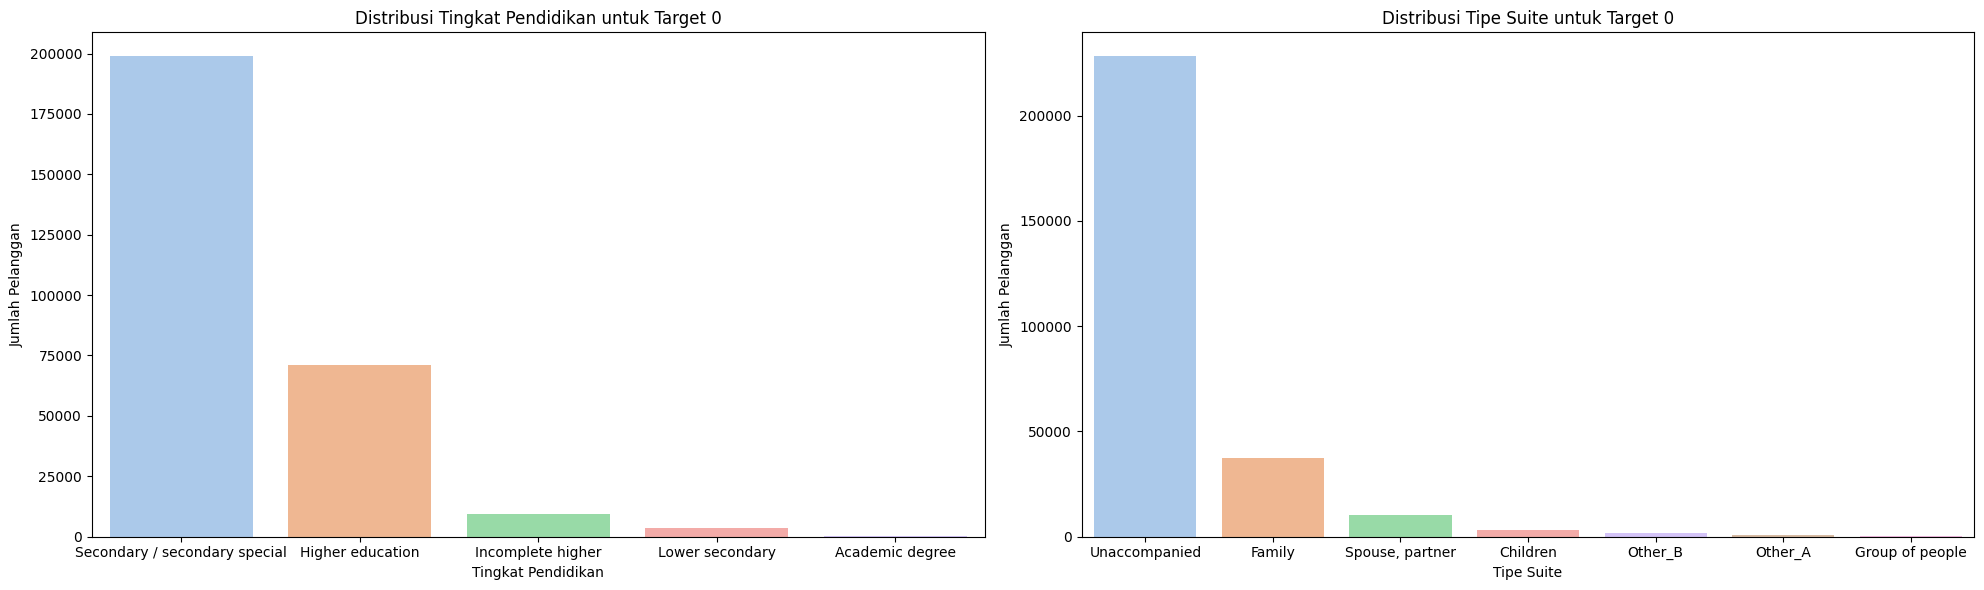

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi tingkat pendidikan dan tipe suite pada data_target_1_only
education_distribution = data_target_0_only['NAME_EDUCATION_TYPE'].value_counts()
suite_distribution = data_target_0_only['NAME_TYPE_SUITE'].value_counts()

# Visualisasi distribusi tingkat pendidikan
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=education_distribution.index, y=education_distribution.values, palette='pastel')
plt.title('Distribusi Tingkat Pendidikan untuk Target 0')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')

# Visualisasi distribusi tipe suite
plt.subplot(1, 2, 2)
sns.barplot(x=suite_distribution.index, y=suite_distribution.values, palette='pastel')
plt.title('Distribusi Tipe Suite untuk Target 0')
plt.xlabel('Tipe Suite')
plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

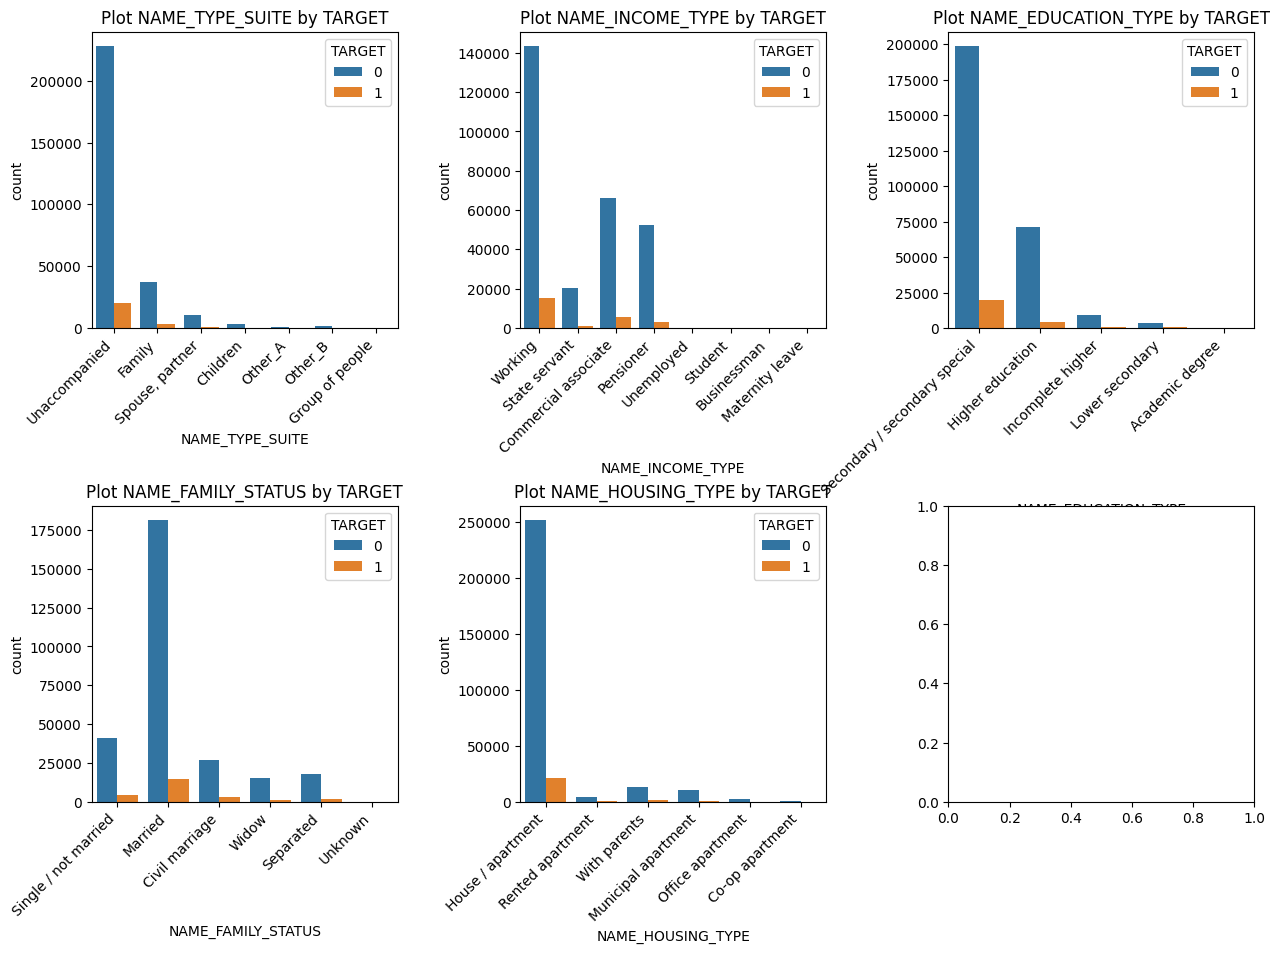

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# List nama kolom yang akan divisualisasikan
columns_to_visualize = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Membuat subplots sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Mengatur tata letak subplot
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterasi untuk membuat stacked bar plot untuk setiap kolom
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=column, hue='TARGET')
    plt.title(f'Plot {column} by TARGET')
    plt.xticks(rotation=45, ha='right')

plt.show()

In [33]:
data_target_1_only.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                   21
NAME_TYPE_SUITE                   70
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    17249
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [34]:
df1 = df1.drop(columns=['ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [36]:
df1.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [37]:
df1 = df1.drop('OWN_CAR_AGE', axis=1)

In [38]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [39]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
count                307511.000000               307511.000000   
mean                      2.031521                    0.015144   
std                       0.502737                    0.122126   
min                       1.000000                    0.000000   
25%                       2.000000                    0.000000   
50%                       2.000000                    0.000000   
75%                       2.000000                    0.000000   
max                       3.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count           307511.000000           307511.000000            307511.000000  
mean                 0.078173                0.230454                 0.179555  
std                  0.268444                0.421124                 0.383817  
min                  0.000000                0.000000                 0.000000  
25%                  0.000000                0.000000

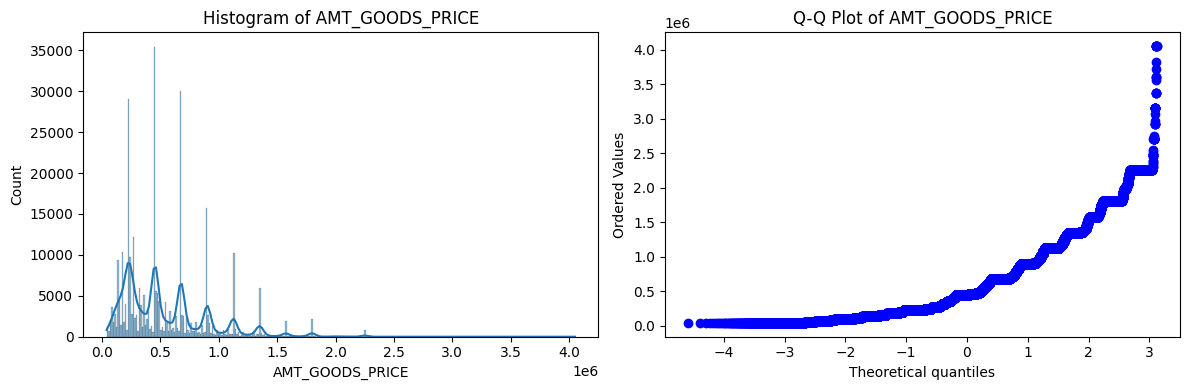

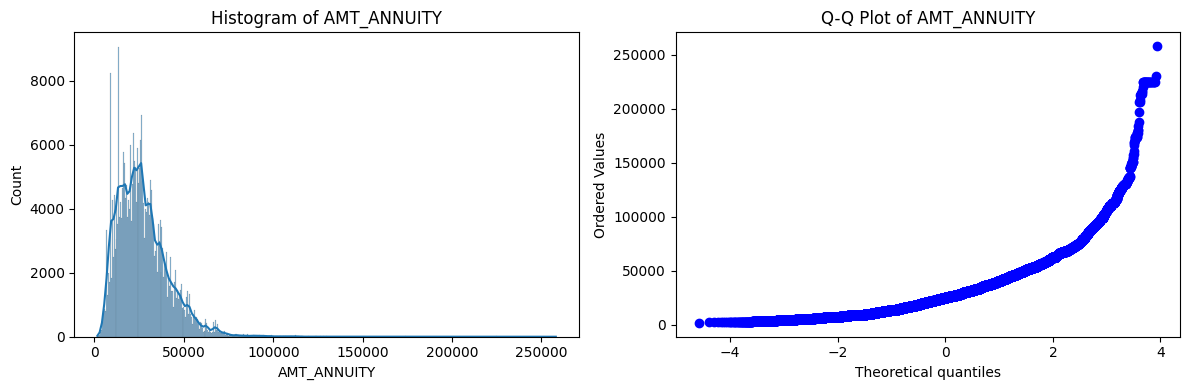

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Gantilah df dengan DataFrame Anda
# Gantilah 'column_list' dengan daftar dua kolom yang ingin Anda periksa

column_list = ['AMT_GOODS_PRICE', 'AMT_ANNUITY']

# Plot histogram dan Q-Q plot untuk masing-masing kolom
for column in column_list:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df1[column], plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()


In [41]:
# Ganti nilai yang hilang dengan median
median_value = df1['AMT_GOODS_PRICE'].median()
df1['AMT_GOODS_PRICE'].fillna(median_value, inplace=True)

In [42]:
# Ganti nilai yang hilang dengan median
median_value = df1['AMT_ANNUITY'].median()
df1['AMT_ANNUITY'].fillna(median_value, inplace=True)

In [44]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION

In [43]:
# Ganti nilai yang hilang dengan modus
mode_value = df1['NAME_TYPE_SUITE'].mode()[0]
df1['NAME_TYPE_SUITE'].fillna(mode_value, inplace=True)

In [45]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [47]:
# Filter data berdasarkan kondisi TARGET == 0
target_0_data = df1[df1['TARGET'] == 0]

# Melihat sebaran data untuk kolom 'CODE GENDER' dan 'NAME CONTRACT TYPE'
gender_contract_target_0 = target_0_data[['CODE_GENDER', 'NAME_CONTRACT_TYPE']]

# Menampilkan sebaran data
print(gender_contract_target_0.value_counts())

CODE_GENDER  NAME_CONTRACT_TYPE
F            Cash loans            169673
M            Cash loans             85338
F            Revolving loans        18605
M            Revolving loans         9066
XNA          Revolving loans            4
dtype: int64


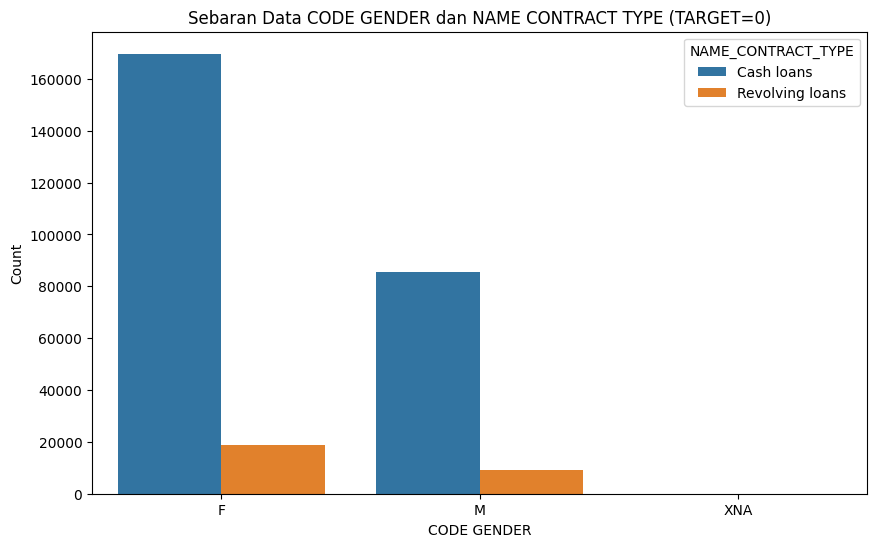

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data berdasarkan kondisi TARGET == 0
target_0_data = df1[df1['TARGET'] == 0]

# Plot sebaran data menggunakan diagram batang
plt.figure(figsize=(10, 6))
sns.countplot(x='CODE_GENDER', hue='NAME_CONTRACT_TYPE', data=target_0_data)
plt.title('Sebaran Data CODE GENDER dan NAME CONTRACT TYPE (TARGET=0)')
plt.xlabel('CODE GENDER')
plt.ylabel('Count')
plt.show()

In [49]:
#cek unique kolom object
column_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for column in column_list:
    unique_values = df1[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'NAME_CONTRACT_TYPE': ['Cash loans' 'Revolving loans']
Unique values in 'CODE_GENDER': ['M' 'F' 'XNA']
Unique values in 'FLAG_OWN_CAR': ['N' 'Y']
Unique values in 'FLAG_OWN_REALTY': ['Y' 'N']


In [50]:
#cek unique kolom object,
column_list = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

for column in column_list:
    unique_values = df1[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'NAME_TYPE_SUITE': ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Unique values in 'NAME_INCOME_TYPE': ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in 'NAME_EDUCATION_TYPE': ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in 'NAME_FAMILY_STATUS': ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in 'NAME_HOUSING_TYPE': ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


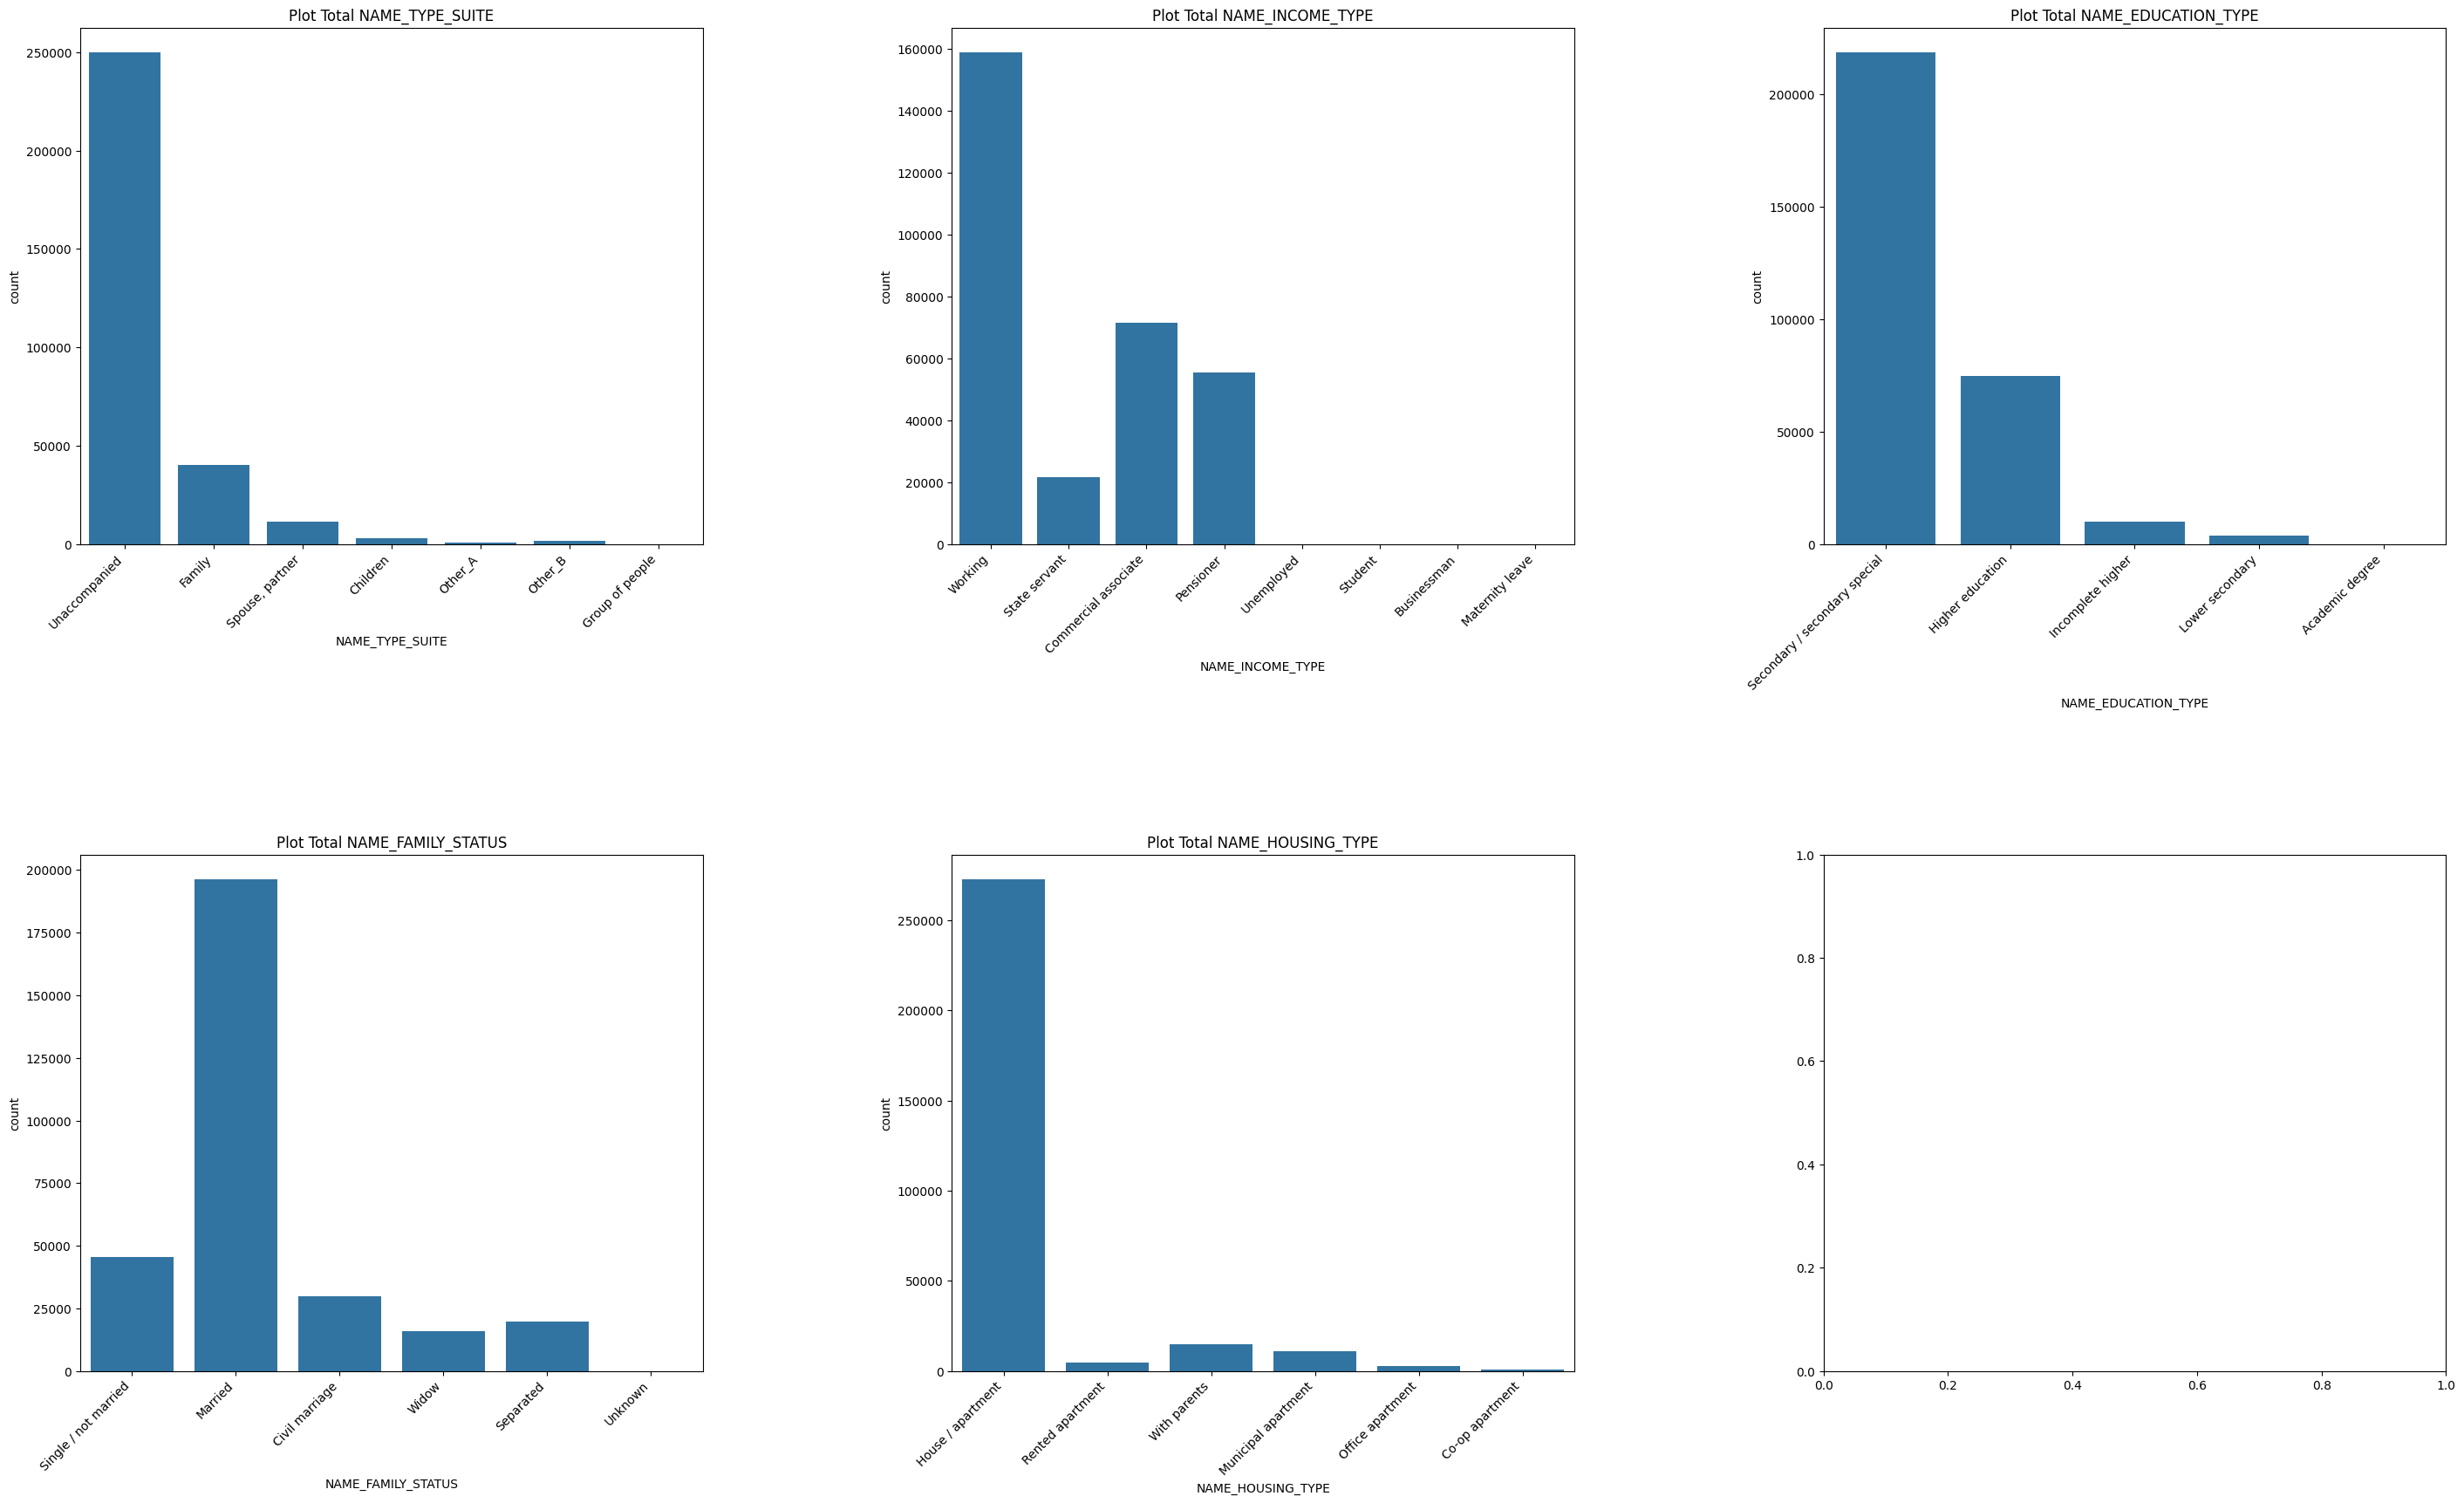

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# List nama kolom yang akan divisualisasikan
columns_to_visualize = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Membuat subplots sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(35, 20))

# Mengatur tata letak subplot
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterasi untuk membuat count plot untuk setiap kolom
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=column)
    plt.title(f'Plot Total {column}')
    plt.xticks(rotation=45, ha='right')

plt.show()

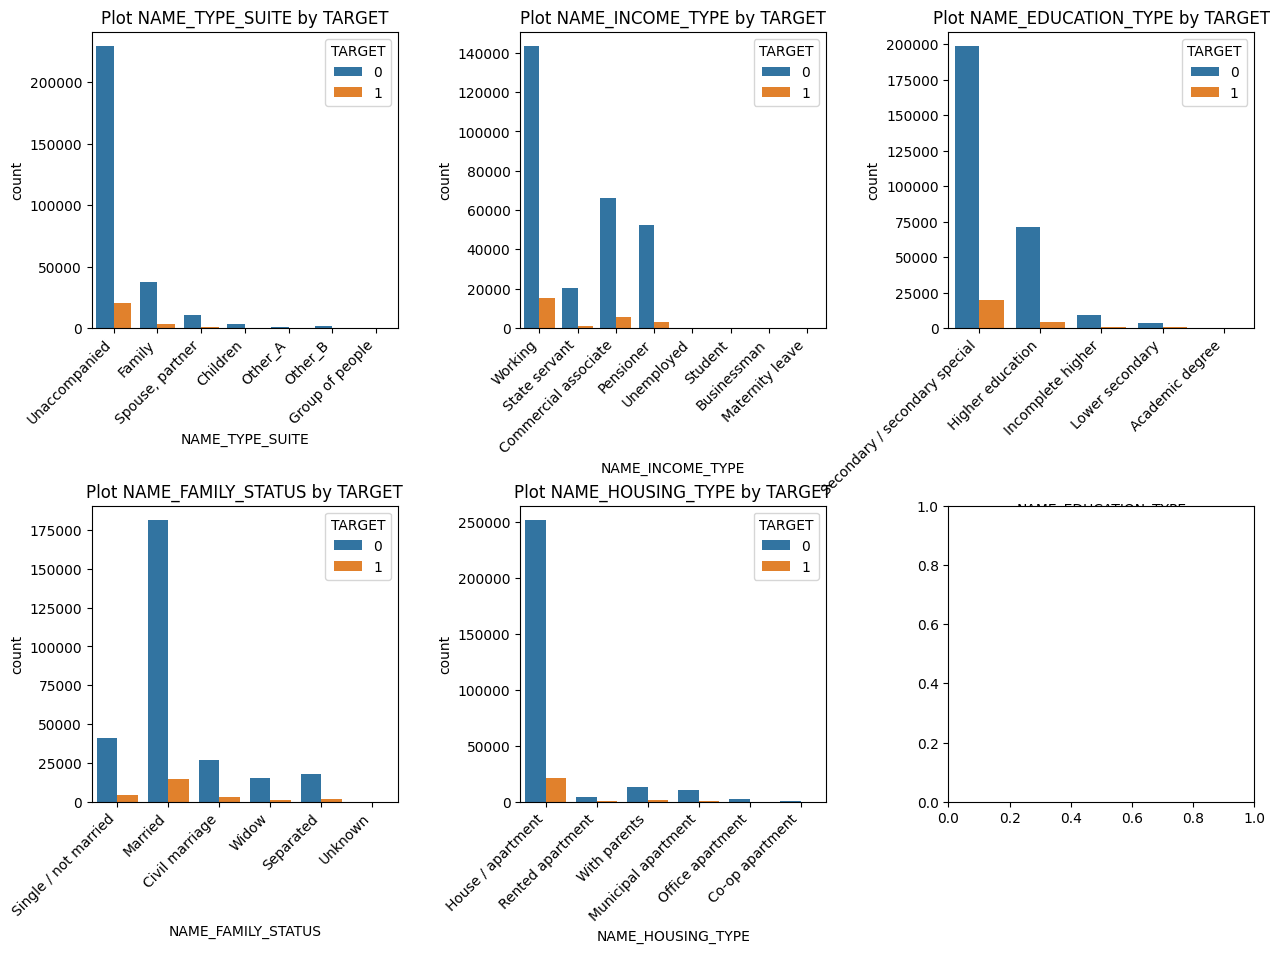

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# List nama kolom yang akan divisualisasikan
columns_to_visualize = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Membuat subplots sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Mengatur tata letak subplot
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterasi untuk membuat stacked bar plot untuk setiap kolom
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=column, hue='TARGET')
    plt.title(f'Plot {column} by TARGET')
    plt.xticks(rotation=45, ha='right')

plt.show()

In [53]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/previous_application_v3.csv')

In [54]:
df2.shape

(1670214, 16)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1670214 non-null  int64  
 1   SK_ID_PREV                1670214 non-null  int64  
 2   SK_ID_CURR                1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE        1670214 non-null  object 
 4   AMT_ANNUITY               1297979 non-null  float64
 5   AMT_APPLICATION           1670214 non-null  float64
 6   AMT_CREDIT                1670213 non-null  float64
 7   AMT_DOWN_PAYMENT          774370 non-null   float64
 8   AMT_GOODS_PRICE           1284699 non-null  float64
 9   RATE_DOWN_PAYMENT         774370 non-null   float64
 10  RATE_INTEREST_PRIMARY     5951 non-null     float64
 11  RATE_INTEREST_PRIVILEGED  5951 non-null     float64
 12  NAME_CASH_LOAN_PURPOSE    1670214 non-null  object 
 13  NAME_CONTRACT_STATUS      1

In [56]:
df2.isnull().sum()

Unnamed: 0                        0
SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                  372235
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_DOWN_PAYMENT             895844
AMT_GOODS_PRICE              385515
RATE_DOWN_PAYMENT            895844
RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
CODE_REJECT_REASON                0
CNT_PAYMENT                  372230
dtype: int64

In [57]:
# List kolom yang memiliki missing values
columns_with_missing_values = ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
                                'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
                                'RATE_INTEREST_PRIVILEGED', 'AMT_ANNUITY', 'CNT_PAYMENT']

# Menggantikan missing values dengan nilai 0
df2[columns_with_missing_values] = df2[columns_with_missing_values].fillna(0)

In [58]:
df2.isnull().sum()

Unnamed: 0                  0
SK_ID_PREV                  0
SK_ID_CURR                  0
NAME_CONTRACT_TYPE          0
AMT_ANNUITY                 0
AMT_APPLICATION             0
AMT_CREDIT                  1
AMT_DOWN_PAYMENT            0
AMT_GOODS_PRICE             0
RATE_DOWN_PAYMENT           0
RATE_INTEREST_PRIMARY       0
RATE_INTEREST_PRIVILEGED    0
NAME_CASH_LOAN_PURPOSE      0
NAME_CONTRACT_STATUS        0
CODE_REJECT_REASON          0
CNT_PAYMENT                 0
dtype: int64

In [59]:
df2['AMT_CREDIT'] = df2['AMT_CREDIT'].fillna(0)

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1670214 non-null  int64  
 1   SK_ID_PREV                1670214 non-null  int64  
 2   SK_ID_CURR                1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE        1670214 non-null  object 
 4   AMT_ANNUITY               1670214 non-null  float64
 5   AMT_APPLICATION           1670214 non-null  float64
 6   AMT_CREDIT                1670214 non-null  float64
 7   AMT_DOWN_PAYMENT          1670214 non-null  float64
 8   AMT_GOODS_PRICE           1670214 non-null  float64
 9   RATE_DOWN_PAYMENT         1670214 non-null  float64
 10  RATE_INTEREST_PRIMARY     1670214 non-null  float64
 11  RATE_INTEREST_PRIVILEGED  1670214 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE    1670214 non-null  object 
 13  NAME_CONTRACT_STATUS      1

In [61]:
df2['CODE_REJECT_REASON'].unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

objectColumns = ['CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_TYPE']
df2_encoded = df2.copy()

for objColumn in objectColumns:
    print(f"Unique values in '{objColumn}' before encoding: {df2_encoded[objColumn].unique()}")

    label = LabelEncoder()
    df2_encoded[objColumn] = label.fit_transform(df2_encoded[objColumn].values)

    print(f"Unique values in '{objColumn}' after encoding: {df2_encoded[objColumn].unique()}")

df2_encoded.info()

Unique values in 'CODE_REJECT_REASON' before encoding: ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
Unique values in 'CODE_REJECT_REASON' after encoding: [7 1 2 0 4 3 8 6 5]
Unique values in 'NAME_CONTRACT_STATUS' before encoding: ['Approved' 'Refused' 'Canceled' 'Unused offer']
Unique values in 'NAME_CONTRACT_STATUS' after encoding: [0 2 1 3]
Unique values in 'NAME_CASH_LOAN_PURPOSE' before encoding: ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
Unique values in 'NAME_CASH_LOAN_PURPOSE' after encoding: [23 24 20  9  7  0 16 13 18 14 17 21  6  5  

In [63]:
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1670214 non-null  int64  
 1   SK_ID_PREV                1670214 non-null  int64  
 2   SK_ID_CURR                1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE        1670214 non-null  int64  
 4   AMT_ANNUITY               1670214 non-null  float64
 5   AMT_APPLICATION           1670214 non-null  float64
 6   AMT_CREDIT                1670214 non-null  float64
 7   AMT_DOWN_PAYMENT          1670214 non-null  float64
 8   AMT_GOODS_PRICE           1670214 non-null  float64
 9   RATE_DOWN_PAYMENT         1670214 non-null  float64
 10  RATE_INTEREST_PRIMARY     1670214 non-null  float64
 11  RATE_INTEREST_PRIVILEGED  1670214 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE    1670214 non-null  int64  
 13  NAME_CONTRACT_STATUS      1

In [64]:
df2 = df2_encoded.copy()

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1670214 non-null  int64  
 1   SK_ID_PREV                1670214 non-null  int64  
 2   SK_ID_CURR                1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE        1670214 non-null  int64  
 4   AMT_ANNUITY               1670214 non-null  float64
 5   AMT_APPLICATION           1670214 non-null  float64
 6   AMT_CREDIT                1670214 non-null  float64
 7   AMT_DOWN_PAYMENT          1670214 non-null  float64
 8   AMT_GOODS_PRICE           1670214 non-null  float64
 9   RATE_DOWN_PAYMENT         1670214 non-null  float64
 10  RATE_INTEREST_PRIMARY     1670214 non-null  float64
 11  RATE_INTEREST_PRIVILEGED  1670214 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE    1670214 non-null  int64  
 13  NAME_CONTRACT_STATUS      1

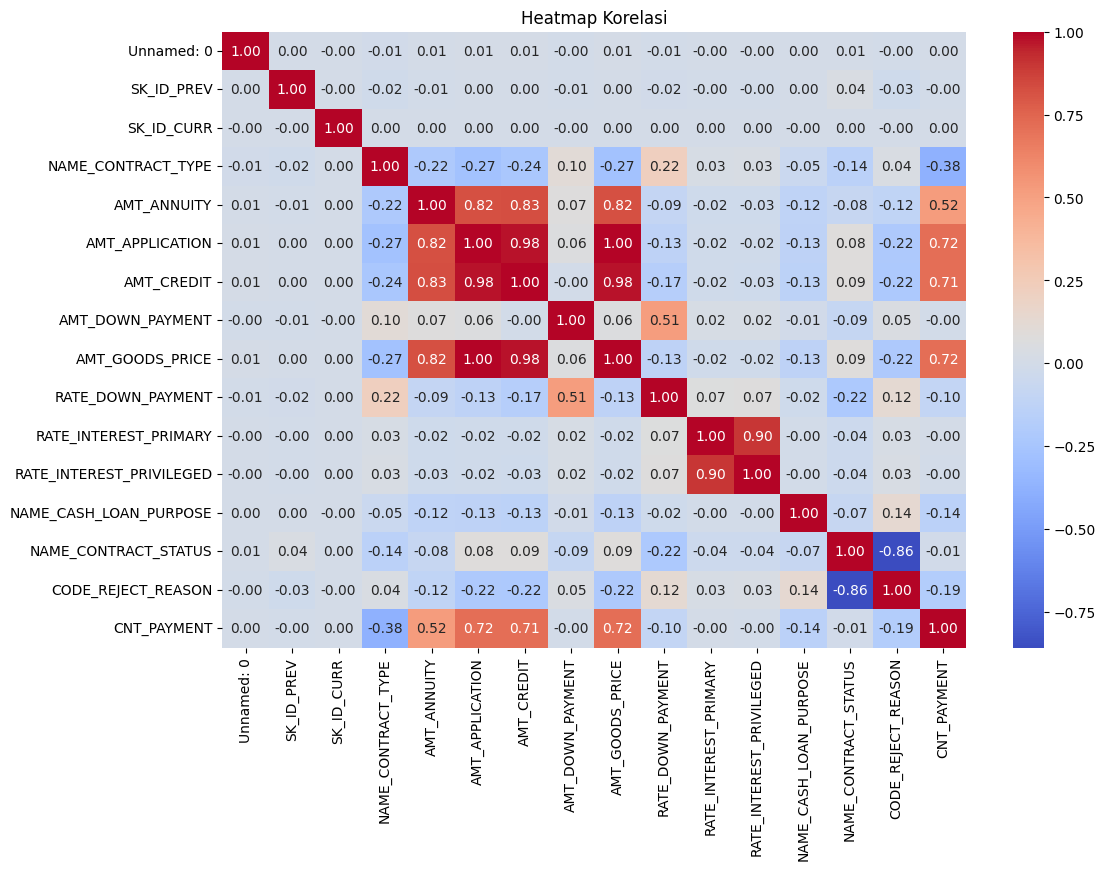

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [67]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [68]:
df3 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/POS_CASH_balance_v1.csv')

In [69]:
df3.shape

(10001358, 8)

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [71]:
df3.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [72]:
df3['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [73]:
contract = {'Amortized debt':0, 'XNA':1,
                  'Canceled':2, 'Demand':3,
                  'Returned to the store':4,'Approved':5,
                  'Signed':6, 'Completed':7,
                  'Active':8,}

df3['NAME_CONTRACT_STATUS'] = df3['NAME_CONTRACT_STATUS'].map(contract)

In [144]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   int64  
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(6)
memory usage: 610.4 MB


In [74]:
df4 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/installments_payments_v1.csv')

In [75]:
df4.shape

(13605401, 8)

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [77]:
df4.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [78]:
# List kolom yang memiliki missing values
columns_with_missing_values = ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

# Menggantikan missing values dengan nilai 0
df4[columns_with_missing_values] = df4[columns_with_missing_values].fillna(0)

In [79]:
df4.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [80]:
df5 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/credit_card_balance_v1.csv')

In [81]:
df5.shape

(3840312, 23)

In [82]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [83]:
df5.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [84]:
df5['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

In [85]:
status = {'Approved':0, 'Refused':1,
                  'Sent proposal':2,'Signed':3,
                  'Demand':4, 'Completed':5,
                  'Active':6,}

df5['NAME_CONTRACT_STATUS'] = df5['NAME_CONTRACT_STATUS'].map(status)

In [86]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [87]:
# List kolom yang akan dihapus
columns_to_drop = ['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
                   'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
                   'CNT_INSTALMENT_MATURE_CUM', 'AMT_DRAWINGS_ATM_CURRENT',
                   'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
                   'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']

# Menghapus kolom-kolom tersebut
df5 = df5.drop(columns=columns_to_drop)

In [88]:
df5.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_PAYMENT_CURRENT          767988
AMT_PAYMENT_TOTAL_CURRENT         0
AMT_RECEIVABLE_PRINCIPAL          0
AMT_RECIVABLE                     0
AMT_TOTAL_RECEIVABLE              0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
dtype: int64

In [89]:
df5['AMT_PAYMENT_CURRENT'] = df5['AMT_PAYMENT_CURRENT'].fillna(0)

In [90]:
df5.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_PAYMENT_CURRENT          0
AMT_PAYMENT_TOTAL_CURRENT    0
AMT_RECEIVABLE_PRINCIPAL     0
AMT_RECIVABLE                0
AMT_TOTAL_RECEIVABLE         0
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [91]:
df6 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/bureau_v1.csv')

In [92]:
df6.shape

(1716428, 17)

In [93]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [94]:
df6.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [95]:
df6.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [96]:
# List kolom yang memiliki missing values
columns_with_missing_values = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
                                'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_ENDDATE',
                                'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE']

# Menggantikan missing values dengan median
df6[columns_with_missing_values] = df6[columns_with_missing_values].fillna(df6[columns_with_missing_values].median())

In [97]:
df6.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE             0
DAYS_ENDDATE_FACT               0
AMT_CREDIT_MAX_OVERDUE          0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                  0
AMT_CREDIT_SUM_DEBT             0
AMT_CREDIT_SUM_LIMIT            0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [98]:
df6['AMT_ANNUITY'] = df6['AMT_ANNUITY'].fillna(df6['AMT_ANNUITY'].median())

In [99]:
df6.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [100]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [101]:
df6['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [102]:
status = {'Closed':0, 'Active':1,
                  'Sold':2,'Bad debt':3,}

df6['CREDIT_ACTIVE'] = df6['CREDIT_ACTIVE'].map(status)

In [103]:
df6['CREDIT_ACTIVE'].unique()

array([0, 1, 2, 3])

In [104]:
df6['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [105]:
current = {'currency 1':0, 'currency 2':1,
                  'currency 3':2,'currency 4':3,}

df6['CREDIT_CURRENCY'] = df6['CREDIT_CURRENCY'].map(current)

In [106]:
df6['CREDIT_CURRENCY'].unique()

array([0, 1, 3, 2])

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [108]:
from sklearn.preprocessing import LabelEncoder

objectColumns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
df1_encoded = df1.copy()

for objColumn in objectColumns:
    print(f"Unique values in '{objColumn}' before encoding: {df1_encoded[objColumn].unique()}")

    label = LabelEncoder()
    df1_encoded[objColumn] = label.fit_transform(df1_encoded[objColumn].values)

    print(f"Unique values in '{objColumn}' after encoding: {df1_encoded[objColumn].unique()}")

df1_encoded.info()

Unique values in 'NAME_CONTRACT_TYPE' before encoding: ['Cash loans' 'Revolving loans']
Unique values in 'NAME_CONTRACT_TYPE' after encoding: [0 1]
Unique values in 'CODE_GENDER' before encoding: ['M' 'F' 'XNA']
Unique values in 'CODE_GENDER' after encoding: [1 0 2]
Unique values in 'FLAG_OWN_CAR' before encoding: ['N' 'Y']
Unique values in 'FLAG_OWN_CAR' after encoding: [0 1]
Unique values in 'FLAG_OWN_REALTY' before encoding: ['Y' 'N']
Unique values in 'FLAG_OWN_REALTY' after encoding: [1 0]
Unique values in 'NAME_TYPE_SUITE' before encoding: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Unique values in 'NAME_TYPE_SUITE' after encoding: [6 1 5 0 3 4 2]
Unique values in 'NAME_INCOME_TYPE' before encoding: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in 'NAME_INCOME_TYPE' after encoding: [7 4 1 3 6 5 0 2]
Unique values in 'NAME_FAMILY_STATUS' before 

In [109]:
df1 = df1_encoded.copy()

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  int64  
 12  NAME_INCOME_TYPE             307511 non-null  int64  
 13 

In [111]:
df4.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [112]:
df5.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                   135000               1800.0                     1800.0   
1                    45000               2250.0                     2250.0   
2                   450000               2250.0                     2250.0   
3                   225000              11925.0                    11925.0   
4                   450000              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                     6       0           0  
1                     6       0           0  
2                     6       0           0  
3                     6       0           0  
4                     6       0           0

In [113]:
df7 = pd.read_csv('/content/drive/MyDrive/dataset_homecredit/bureau_balance_v1.csv')

In [114]:
df7.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [115]:
df7.shape

(27299925, 3)

In [116]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [117]:
df7.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [118]:
df7['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [119]:
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
df7["STATUS"] = df7["STATUS"].map(map_status)

In [120]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   SK_ID_BUREAU    int64
 1   MONTHS_BALANCE  int64
 2   STATUS          int64
dtypes: int64(3)
memory usage: 624.8 MB


# JOIN DATA

In [121]:
df_credit = df1.merge(df2, how='inner', on=['SK_ID_CURR'])
df_credit.head(6)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                     0            1             0   
1      100003       0                     0            0             0   
2      100003       0                     0            0             0   
3      100003       0                     0            0             0   
4      100004       0                     1            1             1   
5      100006       0                     0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                1             0          202500.0      406597.5   
1                0             0          270000.0     1293502.5   
2                0             0          270000.0     1293502.5   
3                0             0          270000.0     1293502.5   
4                1             0           67500.0      135000.0   
5                1             0          135000.0      312682.5   

   AMT_ANNUITY_x  ...  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
0        24700.5  ...      179055.0               0.0           179055.0   
1        35698.5  ...     1035882.0               0.0           900000.0   
2        35698.5  ...      348637.5               0.0           337500.0   
3        35698.5  ...       68053.5            6885.0            68809.5   
4         6750.0  ...       20106.0            4860.0            24282.0   
5        29686.5  ...      675000.0               0.0           675000.0   

   RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0           0.000000                    0.0                       0.0   
1           0.000000                    0.0                       0.0   
2           0.000000                    0.0                       0.0   
3           0.100061                    0.0                       0.0   
4           0.212008                    0.0                       0.0   
5           0.000000                    0.0                       0.0   

   NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  CODE_REJECT_REASON  \
0                      23                     0                   7   
1                      24                     0                   7   
2                      23                     0                   7   
3                      23                     0                   7   
4                      23                     0                   7   
5                      24                     0                   7   

   CNT_PAYMENT  
0         24.0  
1         12.0  
2          6.0  
3         12.0  
4          4.0  
5         48.0  

[6 rows x 50 columns]

In [122]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  int64  
 3   CODE_GENDER                  1413701 non-null  int64  
 4   FLAG_OWN_CAR                 1413701 non-null  int64  
 5   FLAG_OWN_REALTY              1413701 non-null  int64  
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT_x                 1413701 non-null  float64
 9   AMT_ANNUITY_x                1413701 non-null  float64
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64
 11  NAME_TYPE_SUITE              1413701 non-null  int64  
 12  NAME_INCOME_TYPE             1413701 non-n

In [123]:
df_credit.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE_x           0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT_x                   0
AMT_ANNUITY_x                  0
AMT_GOODS_PRICE_x              0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION

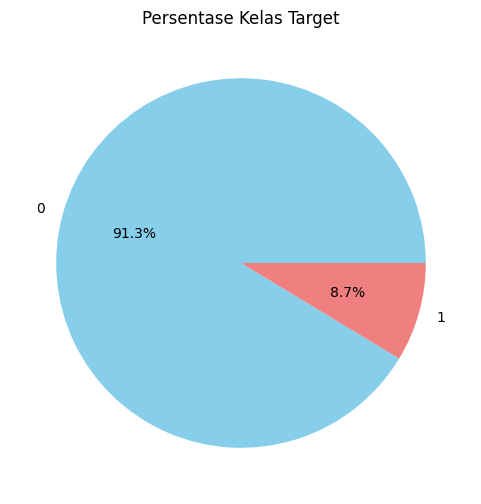

In [124]:
count_target = df_credit['TARGET'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_target, labels=count_target.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Persentase Kelas Target')
plt.show()

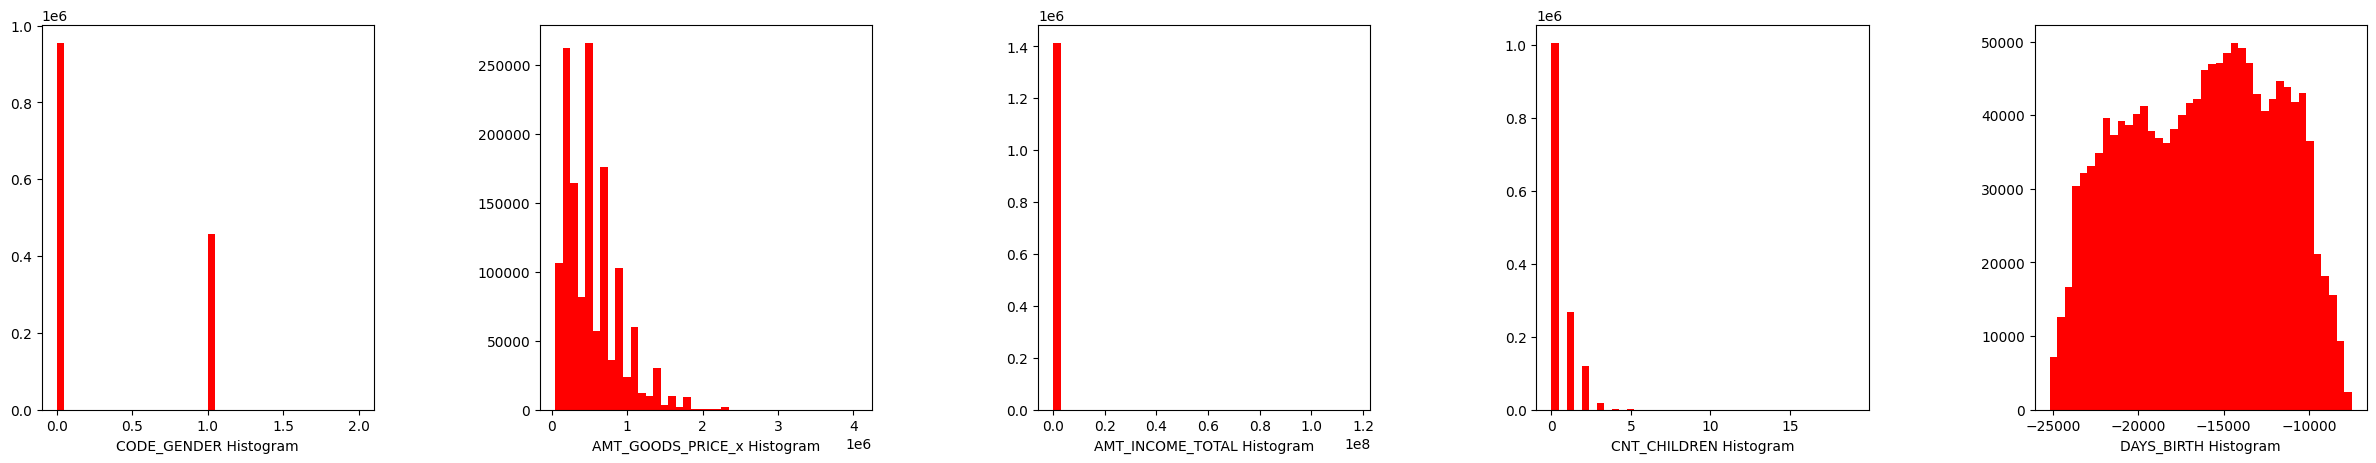

In [125]:
# membuat histogram untuk fitur yang familiar
fig = plt.figure(figsize=(30,5))
plt.subplots_adjust(wspace=.5)

familiar_f = ["CODE_GENDER",
    "AMT_GOODS_PRICE_x",
    "AMT_INCOME_TOTAL",
    "CNT_CHILDREN",
    "DAYS_BIRTH"]

for key, val in enumerate(familiar_f):
    plot = fig.add_subplot(1,len(familiar_f),key+1)
    plt.hist(df_credit[val],bins=40, color="red")
    plot.set_xlabel(""+val+" Histogram")

plt.show()

In [126]:
import pandas as pd

# Misalkan df adalah DataFrame Anda
# Pastikan Anda telah membaca atau memuat data dengan benar

# Ambil baris data dengan target 1
data_target_1 = df_credit[df_credit['TARGET'] == 1]

# Tampilkan hasil atau lakukan operasi lainnya pada data_target_1
print(data_target_1)

         SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0            100002       1                     0            1             0   
161          100047       1                     0            1             0   
162          100047       1                     0            1             0   
163          100047       1                     0            1             0   
164          100047       1                     0            1             0   
...             ...     ...                   ...          ...           ...   
1413559      456225       1                     0            1             0   
1413601      456233       1                     0            0             0   
1413602      456233       1                     0            0             0   
1413691      456254       1                     0            0             0   
1413692      456254       1                     0            0             0   

         FLAG_OWN_REALTY  CNT_CHILDREN 

In [127]:
data_target_1.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0        100002       1                     0            1             0   
161      100047       1                     0            1             0   
162      100047       1                     0            1             0   
163      100047       1                     0            1             0   
164      100047       1                     0            1             0   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                  1             0          202500.0      406597.5   
161                1             0          202500.0     1193580.0   
162                1             0          202500.0     1193580.0   
163                1             0          202500.0     1193580.0   
164                1             0          202500.0     1193580.0   

     AMT_ANNUITY_x  ...  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
0          24700.5  ...      179055.0               0.0           179055.0   
161        35028.0  ...      450000.0               0.0                0.0   
162        35028.0  ...      157500.0               0.0           157500.0   
163        35028.0  ...      744498.0               0.0           675000.0   
164        35028.0  ...       34384.5            3820.5            38205.0   

     RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0             0.000000                    0.0                       0.0   
161           0.000000                    0.0                       0.0   
162           0.000000                    0.0                       0.0   
163           0.000000                    0.0                       0.0   
164           0.108909                    0.0                       0.0   

     NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  CODE_REJECT_REASON  \
0                        23                     0                   7   
161                      23                     0                   7   
162                      24                     0                   7   
163                      24                     2                   2   
164                      23                     0                   7   

     CNT_PAYMENT  
0           24.0  
161          0.0  
162         24.0  
163         36.0  
164         10.0  

[5 rows x 50 columns]

In [128]:
data_target_1.shape

(122360, 50)

In [129]:
data_target_1['TARGET']

0          1
161        1
162        1
163        1
164        1
          ..
1413559    1
1413601    1
1413602    1
1413691    1
1413692    1
Name: TARGET, Length: 122360, dtype: int64

# Train Model and Evaluation

In [130]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

target = df_credit['TARGET']
features = df_credit.drop(['TARGET'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42, stratify=target)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resample data pelatihan menggunakan SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5747415479184129


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression

In [131]:
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [132]:
#pengujian
y_pred_test = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

0.5595509671395376
0.11440550601546062
0.6065707747629945
0.5808332154212542
[[143364 114905]
 [  9628  14844]]


# Random Forest

In [133]:
rf = RandomForestClassifier(random_state=42, max_depth=5, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [134]:
#pengujian
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

0.5961887381030696
0.1293673354708624
0.639710689767898
0.6158877761861958
[[152912 105357]
 [  8817  15655]]


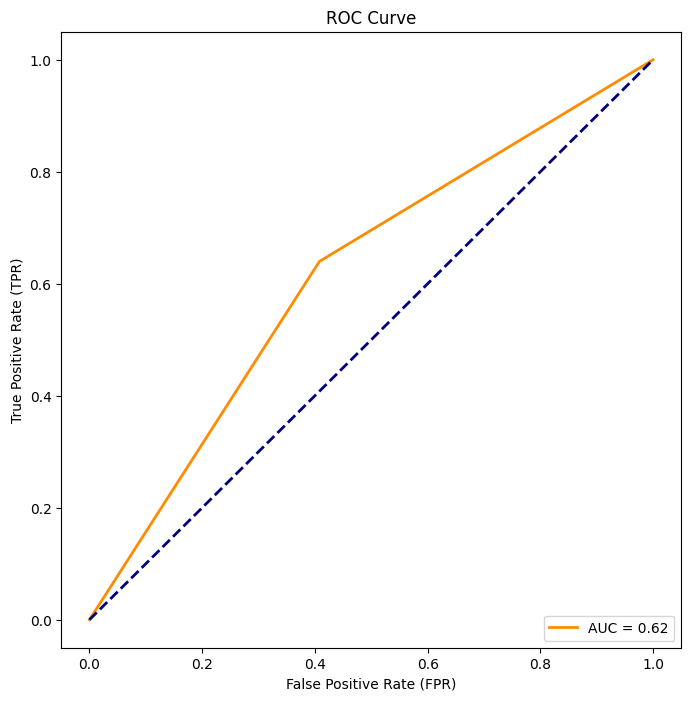

In [137]:
# Menghitung nilai fpr, tpr, dan thresholds menggunakan roc_curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Menghitung nilai AUC
roc_auc = auc(fpr, tpr)

# Membuat plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

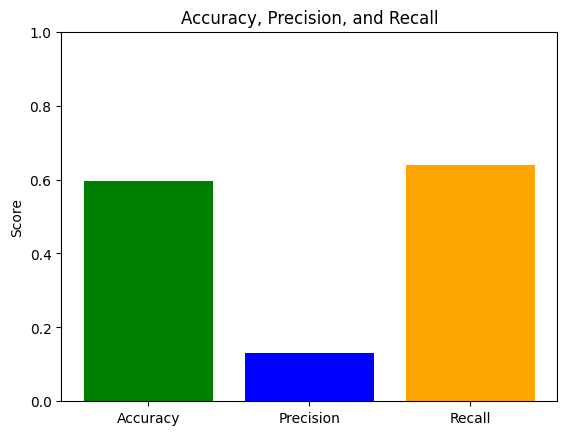

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Menghitung nilai akurasi, precision, dan recall
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Membuat bar plot untuk visualisasi
labels = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(labels, values, color=['green', 'blue', 'orange'])
plt.ylim(0, 1)  # Menyesuaikan batas sumbu y ke rentang 0-1
plt.ylabel('Score')
plt.title('Accuracy, Precision, and Recall')
plt.show()

# Tuning

In [ ]:
pipelineForest = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('forest', RandomForestClassifier())
])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [ ]:
imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_train, y_train)